In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon May 30 10:11:44 2022

@author: roy.369
"""


import numpy as np
import pickle

import matplotlib.pyplot as plt
import os
import sys
from scipy.interpolate import griddata
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colorbar
from matplotlib import rc
mpl.rcParams['axes.linewidth'] = 3
import matplotlib as mpl  
mpl.rc('font',family='Times New Roman')
from matplotlib.pyplot import cm
from numpy.polynomial.polynomial import polyfit
from scipy.optimize import curve_fit
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import ScalarFormatter
from scipy.interpolate import CubicSpline

In [2]:
def arr_loc(val,X):
   ind = 0
   for i in range(len(X)):
      if(round(X[i],2) == round(val,2)):
         ind = i
         break
   return ind


def power_fit(x,a1,m):
    return a1*x**m
  
def linear_fit(x,a,b):
    return a+b*x
    
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx],idx

In [3]:
def r_point_upper_half_grid(N):

    r_lab = []
    r_rel_x = []
    r_rel_y = []
    x_span = int((int(N))/2)+1
    r_pair_1 = 0
    for i in range(x_span):
        for j in range(x_span):
            if(i<=j):
              r_lab.append(r_pair_1)  
              r_rel_x.append(i)
              r_rel_y.append(j)
              r_pair_1 = r_pair_1+1

    R_relative_1 = np.stack((r_rel_x,r_rel_y),axis = 1)
    return R_relative_1,r_pair_1

In [4]:
def r_point_full_grid(N):

    r_lab = []
    r_rel_x = []
    r_rel_y = []
    x_span = int((int(N))/2)+1
    r_pair_2 = 0
    for i in range(x_span):
        for j in range(x_span):
              r_lab.append(r_pair_2)
              r_rel_x.append(i)
              r_rel_y.append(j)
              r_pair_2 = r_pair_2+1

    R_relative_2 = np.stack((r_rel_x,r_rel_y),axis = 1)
    return R_relative_2,r_pair_2

In [5]:
def k_point_grid_upper_half_bz(N):

    K_lab = []
    Kx = []
    Ky = []
    x_span = int((int(N))/2)+1
    k_pair = 0
    for i in range(x_span):
        for j in range(x_span):
            if(i<=j):
              K_lab.append(k_pair)  
              Kx.append(i)
              Ky.append(j)
              k_pair = k_pair+1
    BZ = np.stack((K_lab,Kx,Ky),axis = 1)
    
    return BZ,k_pair


def k_point_grid_full_bz(N):

    K_lab = []
    Kx = []
    Ky = []
    x_span = int((int(N))/2)+1
    k_pair = 0
    for i in range(x_span):
        for j in range(x_span):
              K_lab.append(k_pair)
              Kx.append(i)
              Ky.append(j)
              k_pair = k_pair+1
    BZ = np.stack((K_lab,Kx,Ky),axis = 1)
    
    return BZ,k_pair


In [6]:
def adj_mat_calc(N):

    r_grid, r_rel_grid_size = r_point_full_grid(int(N))
    r_rel_x = r_grid[:,0]
    r_rel_y = r_grid[:,1]

    r_2 = np.add(np.power(r_rel_x,2),np.power(r_rel_y,2))
    r_2_unq = np.sort(np.unique(r_2))

    rx_cord = []
    ry_cord = []
    r2 = []
    rx = np.arange(int(int(N)/2),-1*int(int(N)/2),-1)
    ry = np.arange(int(int(N)/2),-1*int(int(N)/2),-1)
    for i in range(len(rx)):
        for j in range(len(ry)):
            rx_cord.append(rx[i])
            ry_cord.append(ry[j])
            r2.append(rx[i]*rx[i]+ry[j]*ry[j])

    #plt.figure()
    #plt.scatter(rx_cord,ry_cord,c=r2)

    adj_mat = np.zeros(len(r_2_unq))
    for i in range(len(r_2_unq)):
        count = 0
        for i2 in range(len(r2)):
            if round(r2[i2],2) == round(r_2_unq[i],2):
               count = count+1
        adj_mat[i] = count
    
    return np.stack((r_2_unq,np.asarray(adj_mat)),axis = 1)  

In [7]:
def plot_func_multiple_beta_doping(N,u_val,mu,dtau,trot,plot_title,plot_x_label,plot_y_label,x_val,y_val,y_val_err,plot_name):

   color_1 = iter(cm.gnuplot(np.linspace(0, 1, len(trot)+1)))
   plt.figure(figsize = (25,20))
   plt.xticks([0.0,0.5,1.0,1.5,2.0],fontsize = 120)
   plt.yticks(fontsize = 120)
   plt.tick_params(axis='both', which='both', direction='in', pad=20)
   for k in range(len(trot)):
       c_1 = next(color_1)
       beta = (float(dtau))*(float(trot[k]))
       T = round(1/beta,2)
       plt.errorbar(x_val[:,k],y_val[:,k],yerr = y_val_err[:,k],c=c_1,marker = 'o',markersize = 20, elinewidth = 3, capsize = 5,label = r"T = %s"%str(T))
   plt.grid(True,which='both')
   plt.legend(loc = 'best',ncol = 1,fontsize = 50)
   plt.axhline(y=0,color='black',linestyle = 'dashed',linewidth = 2)   
   plt.tight_layout()
   plt.savefig(plot_name)
   plt.close()

In [38]:

def plot_func_multiple_U_doping(N,u_val,mu,dtau,trot,plot_title,plot_x_label,plot_y_label,x_val,y_val,y_val_err,plot_name):

   color_1 = ['blue','darkgreen','olive','darkgoldenrod','orange','red']
   plt.figure(figsize = (25,20))
   plt.xticks([1.0,1.25,1.5,1.75,2.0],fontsize = 120)
   plt.yticks(fontsize = 120)
   plt.tick_params(axis='both', which='major', direction='out', pad=20,length = 30, width = 2.5,labelsize = 120)
   plt.tick_params(axis='both', which='minor', direction='out', pad=20,length = 15, width = 1.5,labelsize = 60)
   for i in range(len(u_val)):
       print(i,"i_val")
       plt.errorbar(x_val[i,:],y_val[i,:],yerr = y_val_err[i,:],c=color_1[i],marker = 'o',markersize = 20, elinewidth = 3, capsize = 5,label = r"U = %s"%str(u_val[i]))
   #plt.errorbar(x_val_ins,y_val_ins,yerr = y_val_err_ins,c='red',marker = 'o',markersize = 20, elinewidth = 3, capsize = 5,label = r"U = 8.0")
   plt.axhline(y=0,color='black',linestyle = 'dashed',linewidth = 2) 
   #plt.xlim(1,2) 
   plt.grid(True,which='both')
   #plt.legend(loc = 'best',ncol=2,fontsize = 80)
   plt.tight_layout()
   plt.savefig(plot_name)
   plt.close()

In [39]:
def equal_time_moment_moment_correlation_function_doping(Text_dir_main_corr,Text_dir_main_eqm,Graph_dir,N,u,Mu,dtau,L):
   
   Adj_list = adj_mat_calc(N)
    
   r_grid, r_rel_grid_size = r_point_upper_half_grid(N)
   r_rel_x = r_grid[:,0]
   r_rel_y = r_grid[:,1]

   r_2 = np.add(np.power(r_rel_x,2),np.power(r_rel_y,2))
   r_2_unq = np.sort(np.unique(r_2))

   M2_M2_corr = np.zeros((len(u),len(Mu),len(L),len(r_2_unq)))
   M2_M2_corr_std = np.zeros((len(u),len(Mu),len(L),len(r_2_unq)))
   
   M2_M2_conn_corr = np.zeros((len(u),len(Mu),len(L),len(r_2_unq)))
   M2_M2_conn_corr_std = np.zeros((len(u),len(Mu),len(L),len(r_2_unq)))
   
   Den_Dbn_conn_corr = np.zeros((len(u),len(Mu),len(L),len(r_2_unq)))
   Den_Dbn_conn_corr_std = np.zeros((len(u),len(Mu),len(L),len(r_2_unq)))
    
   Nrm_M2_M2_conn_corr = np.zeros((len(u),len(Mu),len(L),len(r_2_unq)))
   Nrm_M2_M2_conn_corr_std = np.zeros((len(u),len(Mu),len(L),len(r_2_unq)))

   Nden = np.zeros((len(u),len(Mu),len(L)))
   Nden_std = np.zeros((len(u),len(Mu),len(L)))
   Ndbn = np.zeros((len(u),len(Mu),len(L)))
   Ndbn_std = np.zeros((len(u),len(Mu),len(L)))
    
   Nhln = np.zeros((len(u),len(Mu),len(L)))
   Nhln_std = np.zeros((len(u),len(Mu),len(L)))
    
   M2 = np.zeros((len(u),len(Mu),len(L)))
   M2_std = np.zeros((len(u),len(Mu),len(L)))

   Mu_val =  np.zeros((len(u),len(Mu),len(L)))
   U_val = np.zeros(len(u))
   for i in range(len(u)):
       U_val[i] = float(u[i])
       
   T_val = np.zeros(len(L))   
    
   for i in range(len(u)):
       for j in range(len(Mu)):
           for k in range(len(L)):
               Mu_val[i][j][k] = float(Mu[j])        
               Text_dir_eqm = "%s/Text_files_N_%s_U_%s_dtau_%s/Mu_%s/dtau_%s_L_%s/Thermodynamic_measurements"%(Text_dir_main_eqm,N,u[i],dtau,Mu[j],dtau,L[k])

               filename_eqm_avg = '%s/Thermodynamic_measurements_normal_averaged_dictionary_N_%s_U_%s_mu_%s_dtau_%s_L_%s.pkl' %(Text_dir_eqm,N,u[i],Mu[j],dtau,L[k])
               with open(filename_eqm_avg, 'rb') as infile:
                    sys_measure_avg = pickle.load(infile)

               filename_eqm_std = '%s/Thermodynamic_measurements_normal_standard_deviation_dictionary_N_%s_U_%s_mu_%s_dtau_%s_L_%s.pkl' %(Text_dir_eqm,N,u[i],Mu[j],dtau,L[k])
               with open(filename_eqm_std, 'rb') as infile:
                    sys_measure_std = pickle.load(infile)

               Nden[i][j][k] = sys_measure_avg['Density averaged']
               Nden_std[i][j][k] = sys_measure_std['Density standard deviation']
               Ndbn[i][j][k] = sys_measure_avg['Doublon number averaged']
               Ndbn_std[i][j][k] = sys_measure_std['Doublon number standard deviation']
           
               M2[i][j][k] = np.abs(Nden[i][j][k]-2*Ndbn[i][j][k])
               M2_std[i][j][k] = np.sqrt(4*Ndbn_std[i][j][k]*Ndbn_std[i][j][k]+Nden_std[i][j][k]*Nden_std[i][j][k])
           
               #Text_dir_m2_m2_corr = '%s/Text_files_N_%s_U_%s_dtau_%s/Mu_%s/dtau_%s_L_%s/Moment_moment_correlation_functions'%(Text_dir_main_corr,N,u[i],dtau,Mu[j],dtau,L[k])
               Text_dir_m2_m2_conn_corr = '%s/Text_files_N_%s_U_%s_dtau_%s/Mu_%s/dtau_%s_L_%s/Moment_moment_connected_correlation_functions'%(Text_dir_main_corr,N,u[i],dtau,Mu[j],dtau,L[k])

               #Text_dir_den_dbn_conn_corr = '%s/Text_files_N_%s_U_%s_dtau_%s/Mu_%s/dtau_%s_L_%s/Density_doublon_connected_correlation_functions'%(Text_dir_main_corr,N,u[i],dtau,Mu[j],dtau,L[k])

               #filename_den_dbn_conn_corr = '%s/Equal_time_Density_Doublon_connected_correlation_real_space_neighbor_averaged_normal_avg_N_%s_U_%s_mu_%s_dtau_%s_L_%s.dat'%(Text_dir_den_dbn_conn_corr,N,u[i],Mu[j],dtau,L[k])
               #Den_Dbn_conn_corr[i,j,k,:],Den_Dbn_conn_corr_std[i,j,k,:] = np.loadtxt(filename_den_dbn_conn_corr,unpack = 'True', usecols = [1,2])

           
               #filename_m2_m2_corr = '%s/Equal_time_Moment_Moment_correlation_real_space_neighbor_averaged_normal_avg_N_%s_U_%s_mu_%s_dtau_%s_L_%s.dat'%(Text_dir_m2_m2_corr,N,u[i],Mu[j],dtau,L[k])
               #M2_M2_corr[i,j,k,:],M2_M2_corr_std[i,j,k,:] = np.loadtxt(filename_m2_m2_corr,unpack = 'True', usecols = [1,2])

               filename_m2_m2_conn_corr = '%s/Equal_time_Moment_Moment_connected_correlation_real_space_neighbor_averaged_normal_avg_N_%s_U_%s_mu_%s_dtau_%s_L_%s.dat'%(Text_dir_m2_m2_conn_corr,N,u[i],Mu[j],dtau,L[k])
               M2_M2_conn_corr[i,j,k,:],M2_M2_conn_corr_std[i,j,k,:] = np.loadtxt(filename_m2_m2_conn_corr,unpack = 'True', usecols = [1,2])


               for r in range(len(r_2_unq)):
               
                   Nrm_M2_M2_conn_corr[i,j,k,r] = (1/(M2[i][j][k]*M2[i][j][k]))*(M2_M2_conn_corr[i,j,k,r])
                   Nrm_M2_M2_conn_corr_std[i,j,k,r] = np.abs(Nrm_M2_M2_conn_corr[i,j,k,r])*(M2_M2_conn_corr_std[i,j,k,r]/np.abs(M2_M2_conn_corr[i,j,k,r])+2*M2_std[i][j][k]/M2[i][j][k])
               

   Onsite_m2 = np.zeros((len(u),len(Mu),len(L)))
   Onsite_m2_std = np.zeros((len(u),len(Mu),len(L))) 
   M2_M2_corr_n0 = np.zeros((len(u),len(Mu),len(L)))
   M2_M2_corr_n1 = np.zeros((len(u),len(Mu),len(L)))
   M2_M2_corr_n2 = np.zeros((len(u),len(Mu),len(L)))
   M2_M2_corr_n3 = np.zeros((len(u),len(Mu),len(L)))

   M2_M2_corr_n0_std = np.zeros((len(u),len(Mu),len(L)))
   M2_M2_corr_n1_std = np.zeros((len(u),len(Mu),len(L)))
   M2_M2_corr_n2_std = np.zeros((len(u),len(Mu),len(L)))
   M2_M2_corr_n3_std = np.zeros((len(u),len(Mu),len(L)))

   M2_M2_conn_corr_n0 = np.zeros((len(u),len(Mu),len(L)))
   M2_M2_conn_corr_n1 = np.zeros((len(u),len(Mu),len(L)))
   M2_M2_conn_corr_n2 = np.zeros((len(u),len(Mu),len(L)))
   M2_M2_conn_corr_n3 = np.zeros((len(u),len(Mu),len(L)))
   M2_M2_conn_corr_nl = np.zeros((len(u),len(Mu),len(L)))
   M2_M2_conn_corr_tot = np.zeros((len(u),len(Mu),len(L)))
    
   M2_M2_conn_corr_n0_std = np.zeros((len(u),len(Mu),len(L)))
   M2_M2_conn_corr_n1_std = np.zeros((len(u),len(Mu),len(L)))
   M2_M2_conn_corr_n2_std = np.zeros((len(u),len(Mu),len(L)))
   M2_M2_conn_corr_n3_std = np.zeros((len(u),len(Mu),len(L)))
   M2_M2_conn_corr_nl_std = np.zeros((len(u),len(Mu),len(L)))
   M2_M2_conn_corr_tot_std = np.zeros((len(u),len(Mu),len(L)))
    
   Nrm_M2_M2_conn_corr_n0 = np.zeros((len(u),len(Mu),len(L)))
   Nrm_M2_M2_conn_corr_n1 = np.zeros((len(u),len(Mu),len(L)))
   Nrm_M2_M2_conn_corr_n2 = np.zeros((len(u),len(Mu),len(L)))
   Nrm_M2_M2_conn_corr_n3 = np.zeros((len(u),len(Mu),len(L)))
    
   Nrm_M2_M2_conn_corr_n0_std = np.zeros((len(u),len(Mu),len(L)))
   Nrm_M2_M2_conn_corr_n1_std = np.zeros((len(u),len(Mu),len(L)))
   Nrm_M2_M2_conn_corr_n2_std = np.zeros((len(u),len(Mu),len(L)))
   Nrm_M2_M2_conn_corr_n3_std = np.zeros((len(u),len(Mu),len(L)))


   for i in range(len(u)):
       for j in range(len(Mu)):
           for k in range(len(L)):

               M2_M2_corr_n0[i][j][k] = M2_M2_corr[i][j][k][0]
               M2_M2_corr_n1[i][j][k] = M2_M2_corr[i][j][k][1]
               M2_M2_corr_n2[i][j][k] = M2_M2_corr[i][j][k][2]
               M2_M2_corr_n3[i][j][k] = M2_M2_corr[i][j][k][3]

               M2_M2_corr_n0_std[i][j][k] = M2_M2_corr_std[i][j][k][0]
               M2_M2_corr_n1_std[i][j][k] = M2_M2_corr_std[i][j][k][1]
               M2_M2_corr_n2_std[i][j][k] = M2_M2_corr_std[i][j][k][2]
               M2_M2_corr_n3_std[i][j][k] = M2_M2_corr_std[i][j][k][3]

               M2_M2_conn_corr_n0[i][j][k] = M2_M2_conn_corr[i][j][k][0]
               M2_M2_conn_corr_n1[i][j][k] = M2_M2_conn_corr[i][j][k][1]
               M2_M2_conn_corr_n2[i][j][k] = M2_M2_conn_corr[i][j][k][2]
               M2_M2_conn_corr_n3[i][j][k] = M2_M2_conn_corr[i][j][k][3]
               M2_M2_conn_corr_nl[i,j,k] = np.dot(M2_M2_conn_corr[i,j,k,1:],Adj_list[1:,1])
               M2_M2_conn_corr_nl_std[i,j,k] = np.sqrt(np.dot(np.power(M2_M2_conn_corr_std[i,j,k,1:],2),Adj_list[1:,1])) 

               M2_M2_conn_corr_tot[i,j,k] = np.dot(M2_M2_conn_corr[i,j,k,:],Adj_list[:,1])
               M2_M2_conn_corr_tot_std[i,j,k] = np.sqrt(np.dot(np.power(M2_M2_conn_corr_std[i,j,k,:],2),Adj_list[:,1])) 
               
               M2_M2_conn_corr_n0_std[i][j][k] = M2_M2_conn_corr_std[i][j][k][0]
               M2_M2_conn_corr_n1_std[i][j][k] = M2_M2_conn_corr_std[i][j][k][1]
               M2_M2_conn_corr_n2_std[i][j][k] = M2_M2_conn_corr_std[i][j][k][2]
               M2_M2_conn_corr_n3_std[i][j][k] = M2_M2_conn_corr_std[i][j][k][3]

               Nrm_M2_M2_conn_corr_n0[i][j][k] = Nrm_M2_M2_conn_corr[i][j][k][0]
               Nrm_M2_M2_conn_corr_n1[i][j][k] = Nrm_M2_M2_conn_corr[i][j][k][1]
               Nrm_M2_M2_conn_corr_n2[i][j][k] = Nrm_M2_M2_conn_corr[i][j][k][2]
               Nrm_M2_M2_conn_corr_n3[i][j][k] = Nrm_M2_M2_conn_corr[i][j][k][3]
           
               Nrm_M2_M2_conn_corr_n0_std[i][j][k] = Nrm_M2_M2_conn_corr_std[i][j][k][0]
               Nrm_M2_M2_conn_corr_n1_std[i][j][k] = Nrm_M2_M2_conn_corr_std[i][j][k][1]
               Nrm_M2_M2_conn_corr_n2_std[i][j][k] = Nrm_M2_M2_conn_corr_std[i][j][k][2]
               Nrm_M2_M2_conn_corr_n3_std[i][j][k] = Nrm_M2_M2_conn_corr_std[i][j][k][3]

               #Onsite_m2[i][j][k] = Nden[i][j][k]*(1-Nden[i][j][k])+4*Ndbn[i][j][k]*(1-Ndbn[i][j][k])-2*Den_Dbn_conn_corr[i,j,k,0]
               #Onsite_m2_std[i][j][k] = Nden_std[i][j][k]
           
   Pl_title_n0 = r"$\langle h_i d_j \rangle_{C}$ |i-j|=0.0, $N=%sx%s, n = 1$"%(N,N)
   Pl_title_n1 = r"$\langle h_i d_j \rangle_{C}$ |i-j|=1.0, $N=%sx%s, n = 1$"%(N,N)
   Pl_title_n2 = r"$\langle h_i d_j \rangle_{C}$ |i-j|=1.414, $N=%sx%s, n = 1$"%(N,N)
   Pl_title_n3 = r"$\langle h_i d_j \rangle_{C}$ |i-j|=2.0, $N=%sx%s, n = 1$"%(N,N)

   Pl_title_n0 = r"$\langle h_i d_j \rangle_{C}$ |i-j|=0.0, $N=%sx%s, n = 1$"%(N,N)
   Pl_title_n1 = r"$\langle h_i d_j \rangle_{C}$ |i-j|=1.0, $N=%sx%s, n = 1$"%(N,N)
   Pl_title_n2 = r"$\langle h_i d_j \rangle_{C}$ |i-j|=1.414, $N=%sx%s, n = 1$"%(N,N)
   Pl_title_n3 = r"$\langle h_i d_j \rangle_{C}$ |i-j|=2.0, $N=%sx%s, n = 1$"%(N,N)

   Pl_y_lab = r"$\langle h_i d_j \rangle_{C}$"
   Pl_x_lab = r"$U$"

   Graph_dir_U_comp = "%s/Graph_dir_U_comp"%Graph_dir
   if not os.path.exists(Graph_dir_U_comp):
       os.makedirs(Graph_dir_U_comp)

   Graph_dir_T_comp = "%s/Graph_dir_T_comp"%Graph_dir
   if not os.path.exists(Graph_dir_T_comp):
       os.makedirs(Graph_dir_T_comp)

    
   for i in range(len(u)):
       
       Pl_name_n0 = "%s/Moment_moment_correlation_onsite_normal_averaged_N_%s_U_%s_dtau_%s.png"%(Graph_dir_T_comp,N,u[i],dtau)
       Pl_name_conn_n0 = "%s/Moment_moment_correlation_connected_onsite_normal_averaged_N_%s_U_%s_dtau_%s.png"%(Graph_dir_T_comp,N,u[i],dtau)
       Pl_name_nrm_conn_n0 = "%s/Normalized_Moment_moment_correlation_connected_onsite_normal_averaged_N_%s_U_%s_dtau_%s.png"%(Graph_dir_T_comp,N,u[i],dtau)

       Pl_name_n1 = "%s/Moment_moment_correlation_1st_nearest_neighbor_averaged_normal_averaged_N_%s_U_%s_dtau_%s.png"%(Graph_dir_T_comp,N,u[i],dtau)
       Pl_name_conn_n1 = "%s/Moment_moment_correlation_connected_1st_nearest_neighbor_averaged_normal_averaged_N_%s_U_%s_dtau_%s.png"%(Graph_dir_T_comp,N,u[i],dtau)
       Pl_name_nrm_conn_n1 = "%s/Normalized_Moment_moment_correlation_connected_1st_nearest_neighbor_averaged_normal_averaged_N_%s_U_%s_dtau_%s.png"%(Graph_dir_T_comp,N,u[i],dtau)

       #Pl_name_hl_db = "%s/Holon_doublon_product_normal_averaged_N_%s_dtau_%s_L_%s.png"%(Graph_dir,N,dtau,L[k])
       
       #plot_func_multiple_beta_doping(N,u[i],Mu,dtau,L,Pl_title_n1,Pl_x_lab,Pl_y_lab,Nden[i,:,:],M2_M2_corr_n0[i,:,:],M2_M2_corr_n1_std[i,:,:],Pl_name_n0)
       #plot_func_multiple_beta_doping(N,u[i],Mu,dtau,L,Pl_title_n2,Pl_x_lab,Pl_y_lab,Nden[i,:,:],M2_M2_conn_corr_n0[i,:,:],M2_M2_conn_corr_n1_std[i,:,:],Pl_name_conn_n0)
       #plot_func_multiple_beta_doping(N,u[i],Mu,dtau,L,Pl_title_n3,Pl_x_lab,Pl_y_lab,Nden[i,:,:],Nrm_M2_M2_conn_corr_n0[i,:,:],Nrm_M2_M2_conn_corr_n1_std[i,:,:],Pl_name_nrm_conn_n0)
   
       #plot_func_multiple_beta_doping(N,u[i],Mu,dtau,L,Pl_title_n1,Pl_x_lab,Pl_y_lab,Nden[i,:,:],M2_M2_corr_n1[i,:,:],M2_M2_corr_n1_std[i,:,:],Pl_name_n1)
       #plot_func_multiple_beta_doping(N,u[i],Mu,dtau,L,Pl_title_n2,Pl_x_lab,Pl_y_lab,Nden[i,:,:],M2_M2_conn_corr_n1[i,:,:],M2_M2_conn_corr_n1_std[i,:,:],Pl_name_conn_n1)
       #plot_func_multiple_beta_doping(N,u[i],Mu,dtau,L,Pl_title_n3,Pl_x_lab,Pl_y_lab,Nden[i,:,:],Nrm_M2_M2_conn_corr_n1[i,:,:],Nrm_M2_M2_conn_corr_n1_std[i,:,:],Pl_name_nrm_conn_n1)
       #plot_func_multiple_beta_doping(N,u[i],Mu,dtau,L,Pl_title_n1,Pl_x_lab,Pl_y_lab,Nden[i,:,:],Hl_db[i,:,:],Hl_db_std[i,:,:],Pl_name_hl_db)



   for k in range(len(L)):
       
   #    Pl_name_n0 = "%s/Moment_moment_correlation_onsite_normal_averaged_N_%s_dtau_%s_L_%s.png"%(Graph_dir_U_comp,N,dtau,L[k])
   #    Pl_name_conn_n0 = "%s/Moment_moment_correlation_connected_onsite_normal_averaged_N_%s_dtau_%s_L_%s.png"%(Graph_dir_U_comp,N,dtau,L[k])
   #    Pl_name_nrm_conn_n0 = "%s/Normalized_Moment_moment_correlation_connected_onsite_normal_averaged_N_%s_dtau_%s_L_%s.png"%(Graph_dir_U_comp,N,dtau,L[k])

   #    Pl_name_n1 = "%s/Moment_moment_correlation_1st_nearest_neighbor_averaged_normal_averaged_N_%s_dtau_%s_L_%s.png"%(Graph_dir_U_comp,N,dtau,L[k])
       Pl_name_conn_n2 = "%s/Moment_moment_correlation_connected_2nd_nearest_neighbor_averaged_normal_averaged_N_%s_dtau_%s_L_%s.png"%(Graph_dir_U_comp,N,dtau,L[k])
       
       Pl_name_conn_n1 = "%s/Moment_moment_correlation_connected_1st_nearest_neighbor_averaged_normal_averaged_N_%s_dtau_%s_L_%s.png"%(Graph_dir_U_comp,N,dtau,L[k])
   #    Pl_name_conn_nl = "%s/Moment_moment_correlation_connected_non_local_normal_averaged_N_%s_dtau_%s_L_%s.png"%(Graph_dir_U_comp,N,dtau,L[k])
   #    Pl_name_nrm_conn_n1 = "%s/Normalized_Moment_moment_correlation_connected_1st_nearest_neighbor_averaged_normal_averaged_N_%s_dtau_%s_L_%s.png"%(Graph_dir_U_comp,N,dtau,L[k])
       #Pl_name_conn_nl_vs_mu = "%s/Moment_moment_correlation_connected_non_local_normal_averaged_N_%s_dtau_%s_L_%s.png"%(Graph_dir,N,dtau,L[k])
   #    Pl_name_conn_tot = "%s/Total_Moment_moment_correlation_connected_normal_averaged_N_%s_dtau_%s_L_%s.png"%(Graph_dir_U_comp,N,dtau,L[k])
             
   #    Pl_name_m2 = "%s/Local_moment_normal_averaged_N_%s_dtau_%s_L_%s.png"%(Graph_dir,N,dtau,L[k])
   #    Pl_name_onsite_m2 = "%s/Onsite_moment_normal_averaged_N_%s_dtau_%s_L_%s.png"%(Graph_dir,N,dtau,L[k])
   #    Pl_name_fluct = "%s/Moment_fluctuations_N_%s_dtau_%s_L_%s.png"%(Graph_dir,N,dtau,L[k])
       
   #    plot_func_multiple_U_doping(N,u,Mu,dtau,L[k],Pl_title_n1,Pl_x_lab,Pl_y_lab,Nden[:,:,k],M2_M2_corr_n0[:,:,k],M2_M2_corr_n1_std[:,:,k],Pl_name_n0)
   #    plot_func_multiple_U_doping(N,u,Mu,dtau,L[k],Pl_title_n2,Pl_x_lab,Pl_y_lab,Nden[:,:,k],M2_M2_conn_corr_n0[:,:,k],M2_M2_conn_corr_n1_std[:,:,k],Pl_name_conn_n0)
    #   plot_func_multiple_U_doping(N,u,Mu,dtau,L[k],Pl_title_n3,Pl_x_lab,Pl_y_lab,Nden[:,:,k],Nrm_M2_M2_conn_corr_n0[:,:,k],Nrm_M2_M2_conn_corr_n1_std[:,:,k],Pl_name_nrm_conn_n0)
   
   #    plot_func_multiple_U_doping(N,u,Mu,dtau,L[k],Pl_title_n1,Pl_x_lab,Pl_y_lab,Nden[:,:,k],M2_M2_corr_n1[:,:,k],M2_M2_corr_n1_std[:,:,k],Pl_name_n1)
       plot_func_multiple_U_doping(N,u,Mu,dtau,L[k],Pl_title_n2,Pl_x_lab,Pl_y_lab,Nden[:,:,k],M2_M2_conn_corr_n1[:,:,k],M2_M2_conn_corr_n1_std[:,:,k],Pl_name_conn_n1)
       #plot_func_multiple_U_doping(N,u,Mu,dtau,L[k],Pl_title_n2,Pl_x_lab,Pl_y_lab,Nden[:,:,k],M2_M2_conn_corr_n2[:,:,k],M2_M2_conn_corr_n2_std[:,:,k],Pl_name_conn_n2)
   #    plot_func_multiple_U_doping(N,u,Mu,dtau,L[k],Pl_title_n2,Pl_x_lab,Pl_y_lab,Nden[:,:,k],M2_M2_conn_corr_nl[:,:,k],M2_M2_conn_corr_nl_std[:,:,k],Pl_name_conn_nl)
   #    plot_func_multiple_U_doping(N,u,Mu,dtau,L[k],Pl_title_n3,Pl_x_lab,Pl_y_lab,Nden[:,:,k],Nrm_M2_M2_conn_corr_n1[:,:,k],Nrm_M2_M2_conn_corr_n1_std[:,:,k],Pl_name_nrm_conn_n1)
   #    plot_func_multiple_U_doping(N,u,Mu,dtau,L,Pl_title_n1,Pl_x_lab,Pl_y_lab,Nden[:,:,k],M2[:,:,k],M2_std[:,:,k],Pl_name_m2)
   #    plot_func_multiple_U_doping(N,u,Mu,dtau,L[k],Pl_title_n2,Pl_x_lab,Pl_y_lab,Nden[:,:,k],M2_M2_conn_corr_tot[:,:,k],M2_M2_conn_corr_tot_std[:,:,k],Pl_name_conn_tot)
   #    plot_func_multiple_U_doping(N,u,Mu,dtau,L[k],Pl_title_n2,Pl_x_lab,Pl_y_lab,Nden[:,:,k],Onsite_m2[:,:,k],Onsite_m2_std[:,:,k],Pl_name_onsite_m2)
   #    plot_func_multiple_U_doping(N,u,Mu,dtau,L[k],Pl_title_n2,Pl_x_lab,Pl_y_lab,Nden[:,:,k],np.add(Onsite_m2[:,:,k],M2_M2_conn_corr_nl[:,:,k]),Onsite_m2_std[:,:,k],Pl_name_fluct)
                      
   #    plt.figure(figsize = (28,20))
   #    plt.xticks(fontsize = 80)
   #    plt.yticks(fontsize = 80)
   #    for i in range(len(u)):
   #        plt.errorbar(Mu_val[i,:,k],M2_M2_conn_corr_nl[i,:,k],yerr=M2_M2_conn_corr_nl_std[i,:,k],marker = "o",markersize = 20,label = "U=%s"%u[i])
   #    plt.grid(True,which='both')
   #    plt.legend(loc='best',fontsize = 50)
   #    plt.savefig("%s/Non_local_moment_correlation_vs_mu_N_%s_dtau_%s_L_%s.png"%(Graph_dir,N,dtau,L[k]))


In [65]:
def equal_time_moment_moment_correlation_function_doping_U_scaling(Text_dir_main_corr,Text_dir_main_eqm,Graph_dir,N,U,Mu,dtau,L):


   Adj_list = adj_mat_calc(N)
    
   r_grid, r_rel_grid_size = r_point_upper_half_grid(N)
   r_rel_x = r_grid[:,0]
   r_rel_y = r_grid[:,1]

   r_2 = np.add(np.power(r_rel_x,2),np.power(r_rel_y,2))
   r_2_unq = np.sort(np.unique(r_2))

   
   M2_M2_conn_corr = np.zeros((len(Mu),len(U),len(r_2_unq)))
   M2_M2_conn_corr_std = np.zeros((len(Mu),len(U),len(r_2_unq)))
    
   Nden = np.zeros((len(Mu),len(U)))
   Nden_std = np.zeros((len(Mu),len(U)))



   Mu_val = np.zeros(len(Mu))
    
   for j in range(len(Mu)):
       Mu_val[j] = float(Mu[j])

   Beta_val = np.zeros(len(L))
   for k in range(len(L)):
       Beta_val[k] = float(dtau)*float(L[k])

   U_val = np.zeros(len(U))
   for i in range(len(U)):
       U_val[i] = float(U[i])
    
   for j in range(len(Mu)):
       for k in range(len(U)):
                       
           Text_dir_eqm = "%s/Text_files_N_%s_U_%s_dtau_%s/Mu_%s/dtau_%s_L_%s/Thermodynamic_measurements"%(Text_dir_main_eqm,N,U[k],dtau,Mu[j],dtau,L)

           filename_eqm_avg = '%s/Thermodynamic_measurements_normal_averaged_dictionary_N_%s_U_%s_mu_%s_dtau_%s_L_%s.pkl' %(Text_dir_eqm,N,U[k],Mu[j],dtau,L)
           with open(filename_eqm_avg, 'rb') as infile:
                sys_measure_avg = pickle.load(infile)

           filename_eqm_std = '%s/Thermodynamic_measurements_normal_standard_deviation_dictionary_N_%s_U_%s_mu_%s_dtau_%s_L_%s.pkl' %(Text_dir_eqm,N,U[k],Mu[j],dtau,L)
           with open(filename_eqm_std, 'rb') as infile:
                sys_measure_std = pickle.load(infile)

           Nden[j][k] = sys_measure_avg['Density averaged']
           Nden_std[j][k] = sys_measure_std['Density standard deviation']
           
           Text_dir_m2_m2_conn_corr = '%s/Text_files_N_%s_U_%s_dtau_%s/Mu_%s/dtau_%s_L_%s/Moment_moment_connected_correlation_functions'%(Text_dir_main_corr,N,U[k],dtau,Mu[j],dtau,L)

           filename_m2_m2_conn_corr = '%s/Equal_time_Moment_Moment_connected_correlation_real_space_neighbor_averaged_normal_avg_N_%s_U_%s_mu_%s_dtau_%s_L_%s.dat'%(Text_dir_m2_m2_conn_corr,N,U[k],Mu[j],dtau,L)
           M2_M2_conn_corr[j,k,:],M2_M2_conn_corr_std[j,k,:] = np.loadtxt(filename_m2_m2_conn_corr,unpack = 'True', usecols = [1,2])
    
 
   M2_M2_conn_corr_n0 = np.zeros((len(Mu),len(U)))
   M2_M2_conn_corr_n0_std = np.zeros((len(Mu),len(U)))

   M2_M2_conn_corr_tot = np.zeros((len(Mu),len(U)))
   M2_M2_conn_corr_n1 = np.zeros((len(Mu),len(U))) 
   M2_M2_conn_corr_tot_std = np.zeros((len(Mu),len(U)))
   M2_M2_conn_corr_n1_std = np.zeros((len(Mu),len(U))) 

    
   for j in range(len(Mu)):
       for k in range(len(U)):

           M2_M2_conn_corr_n0[j][k] = M2_M2_conn_corr[j][k][0]
           M2_M2_conn_corr_n0_std[j][k] = M2_M2_conn_corr_std[j][k][0]

           M2_M2_conn_corr_tot[j,k] = np.dot(M2_M2_conn_corr[j,k,:],Adj_list[:,1])
           M2_M2_conn_corr_tot_std[j,k] = np.sqrt(np.dot(np.power(M2_M2_conn_corr_std[j,k,:],2),Adj_list[:,1])) 
           
           M2_M2_conn_corr_n1[j,k] = M2_M2_conn_corr[j][k][1]
           M2_M2_conn_corr_n1_std[j,k] = M2_M2_conn_corr_std[j][k][1] 

   #========================================Fitting data with cubic spline for temperature scaling=================

   Graph_dir_data_fit = "%s/Graph_spline_fit"%Graph_dir 
   if not os.path.exists(Graph_dir_data_fit):
       os.makedirs(Graph_dir_data_fit)
       
   nden_fit = np.asarray([1.0,1.05,1.07,1.10,1.15,1.20]) #,1.08,1.09,1.10])
   nden_test = np.linspace(1.0,1.2,num=201)
    
   M2_corr_n0_fit = np.zeros((len(nden_fit),len(U)))    
   M2_corr_tot_fit = np.zeros((len(nden_fit),len(U)))
   M2_corr_n1_fit = np.zeros((len(nden_fit),len(U))) 

   #Comp_n0_fit = np.zeros((len(nden_fit),len(U)))    
   #Comp_tot_fit = np.zeros((len(nden_fit),len(U)))
   #Comp_nl_fit = np.zeros((len(nden_fit),len(U))) 
    
   #Comp_derv_n0_fit = np.zeros((len(nden_fit),len(L)))    
   #Comp_derv_tot_fit = np.zeros((len(nden_fit),len(L)))
   #Comp_derv_nl_fit = np.zeros((len(nden_fit),len(L))) 
    
   #T_val = np.zeros(len(L))
    
   for k in range(len(U)):
       
       #T_val[k] = 1/(float(dtau)*float(L[k]))
       
       x = Nden[:20,k]
       y_n0 = M2_M2_conn_corr_n0[:20,k]
       y_n1 = M2_M2_conn_corr_n1[:20,k]
       y_tot = M2_M2_conn_corr_tot[:20,k]
       
       cs_n0 = CubicSpline(x,y_n0,bc_type='natural')
       cs_n1 = CubicSpline(x,y_n1,bc_type='natural')
       cs_tot = CubicSpline(x,y_tot,bc_type='natural')

       plt.figure(figsize = (25,20))
       plt.xticks(fontsize = 80)
       plt.yticks(fontsize = 80)
       plt.plot(x,y_n0,marker = "o",markersize = 25, label = "n0")
       plt.plot(nden_test,cs_n0(nden_test),linewidth = 2)
       plt.plot(x,y_n1,marker = "+",markersize = 25, label = "nl")
       plt.plot(nden_test,cs_n1(nden_test),linewidth = 2)
       plt.plot(x,y_tot,marker = "^", markersize = 25, label = "tot")
       plt.plot(nden_test, cs_tot(nden_test),linewidth = 2)
       plt.grid(True, which = 'both')
       plt.legend(loc = 'best',fontsize= 40)
       plt.savefig("%s/Spline_fit_N_%s_U_%s_dtau_%s_L_%s.png"%(Graph_dir_data_fit,N,U[k],dtau,L))

       M2_corr_n0_fit[:,k] = cs_n0(nden_fit)    
       M2_corr_n1_fit[:,k] = cs_n1(nden_fit)
       M2_corr_tot_fit[:,k] = cs_tot(nden_fit) 

       #Comp_n0_fit[:,k] = cs_n0(nden_fit)/T_val[k]  
       #Comp_tot_fit[:,k] = cs_tot(nden_fit)/T_val[k]
       #Comp_nl_fit[:,k] = cs_nl(nden_fit)/T_val[k]
       
   #Comp_derv_n0_fit = np.gradient(Comp_n0_fit,T_val,axis = 1)
   #Comp_derv_tot_fit = np.gradient(Comp_tot_fit,T_val,axis = 1)
   #Comp_derv_nl_fit = np.gradient(Comp_nl_fit,T_val,axis = 1) 

#=============================Density correlations=============================================================
    
   plt.figure(figsize = (28,50))
   plt.xticks([0,2,4,6,8],fontsize = 120)
   plt.yticks([-10,-5,0,5,10,15],fontsize = 120) 
   plt.xlim(0,10)
   plt.ylim(-10,17) 
   plt.tick_params(axis='both', which='major', direction='out', pad=20,length = 30, width = 2.5,labelsize = 120)
   plt.tick_params(axis='both', which='minor', direction='out', pad=20,length = 15, width = 1.5,labelsize = 60)
   for i in range(len(nden_fit)):
       Num = nden_fit[i]
       plt.plot(U_val,M2_corr_n1_fit[i,:]*10**3,marker = "o",markersize =25, label = "n=%s"%(str(round(Num,3))))
   plt.grid(True, which = 'both')
   plt.legend(loc = 'best',ncol=3,fontsize = 70)
   plt.tight_layout() 
   plt.savefig("%s/Temperature_scaling_nearest_moment_correlation_N_%s_dtau_%s_L_%s.png"%(Graph_dir_data_fit,N,dtau,L))

   plt.figure(figsize = (25,20))
   plt.xticks([2,4,6,8],fontsize = 80)
   plt.yticks(fontsize = 80) 
   for i in range(len(nden_fit)):
       Num = nden_fit[i]
       plt.plot(U_val,M2_corr_tot_fit[i,:],marker = "o",markersize =20, label = "n=%s"%(str(round(Num,3))))
   plt.grid(True, which = 'both')
   plt.legend(loc = 'best',ncol=3,fontsize = 70)
   plt.tight_layout() 
   plt.savefig("%s/Temperature_scaling_total_moment_correlation_N_%s_U_%s_dtau_%s.png"%(Graph_dir_data_fit,N,dtau,L))





In [66]:
def main():

    N = "10"
    Dtau = "0.05"

    #================================= these are for multiple U plots =================================================

    #U = ["1.0","4.0","5.0","6.0","8.0","10.0"]
    #Mu = ["0.00","0.50","1.00","1.50","2.00","2.50","3.00","3.50","4.00","4.50","5.00","5.50","6.00","6.50","7.00",
          #"7.50","8.00","8.50","9.00","9.50","10.00"]
    #Mu_hf ="0.00"
    #Trot = ["30"] 

    #=========================== This is for U scaling at fixed densities =============================================
    
    U=["1.0","2.0","3.0","4.00","5.0","6.00","7.0","8.00","9.0"] 
    Trot = ["30"] #,"30","40","50","60"] #"22","24","26","28","30","32","34","36","38","40","42","44","46","48","50","54","56","60"]
    #
    #Mu = #["-9.50","-9.00","-8.50","-8.00","-7.50","-7.00","-6.50","-6.00","-5.50","-5.00","-4.50","-4.00","-3.50","-3.00","-2.50",
          #"-2.00","-1.50","-1.00","-0.50",[
    Mu = ["0.00","0.20","0.40","0.60","0.80","1.00","1.20","1.40","1.60","1.80","2.00","2.20","2.40","2.60","2.80","3.00","3.20","3.40","3.60","3.80","4.00","4.50","5.00","5.50","6.00","6.50","7.00","7.50","8.00","8.50","9.00","9.50","10.00"]

    #Trot_hf = ["30"] #,"22","24","26","28","30","32","34","36","38","40","42","44","46","48","54","56","60"]
    
    Text_dir_main_corr = '/Users/roy.369/Documents/Cold_atom_correlators/FHM_Legacy_data/FHM_Roy_data/Text_files/Text_files_N_%s_real_space_correlations'%N
    Text_dir_main_eqm = '/Users/roy.369/Documents/Cold_atom_correlators/FHM_Legacy_data/FHM_Roy_data/Text_files/Text_files_N_%s'%N
    
    
    Graph_dir = '/Users/roy.369/Documents/Cold_atom_correlators/FHM_Legacy_data/FHM_Roy_data/Graphs/Graphs_N_%s/Graphs_N_%s_dtau_%s_real_space_correlations_normal_averaged/Moment_moment_correlations'%(N,N,Dtau)
    if not os.path.exists(Graph_dir):
        os.makedirs(Graph_dir)

    #equal_time_moment_moment_correlation_function_half_filling(Text_dir_main_corr_hf,Text_dir_main_eqm_hf,Graph_dir_hf,N,U_hf,"0.00",Dtau,Trot_hf)
    #equal_time_moment_moment_correlation_function_doping(Text_dir_main_corr,Text_dir_main_eqm,Graph_dir,N,U,Mu,Dtau,Trot)
    equal_time_moment_moment_correlation_function_doping_U_scaling(Text_dir_main_corr,Text_dir_main_eqm,Graph_dir,N,U,Mu,Dtau,Trot[0])



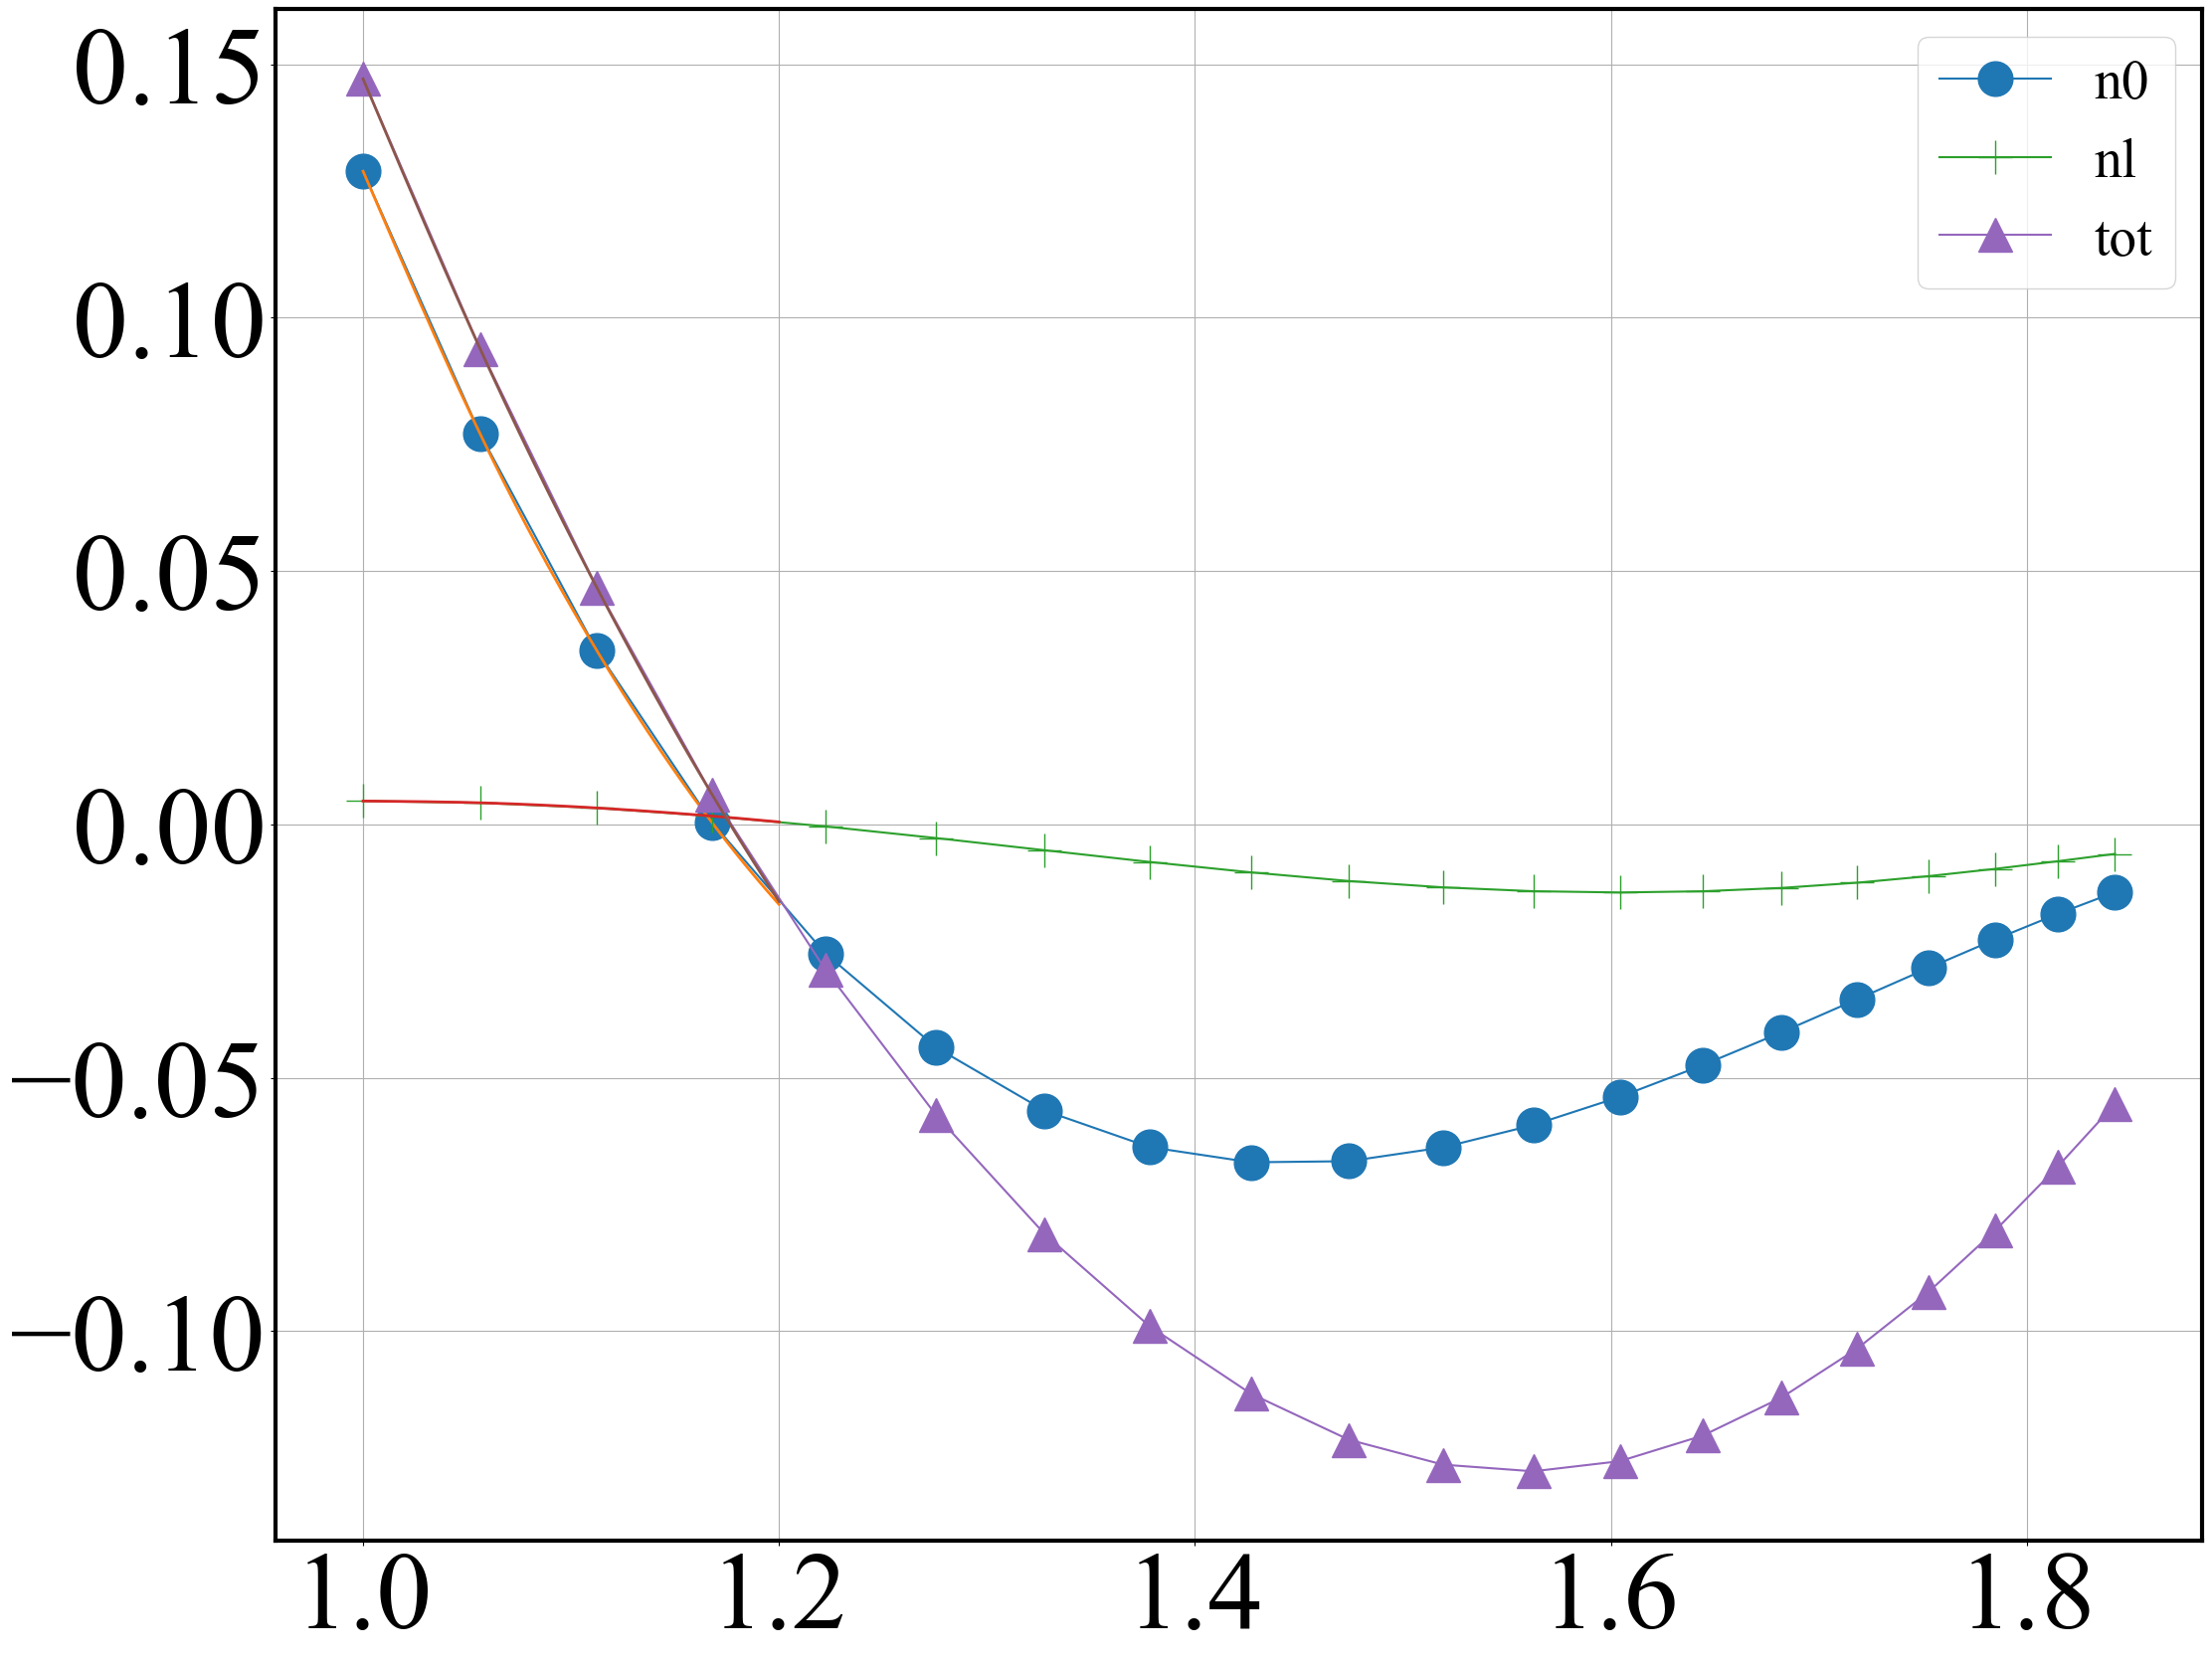

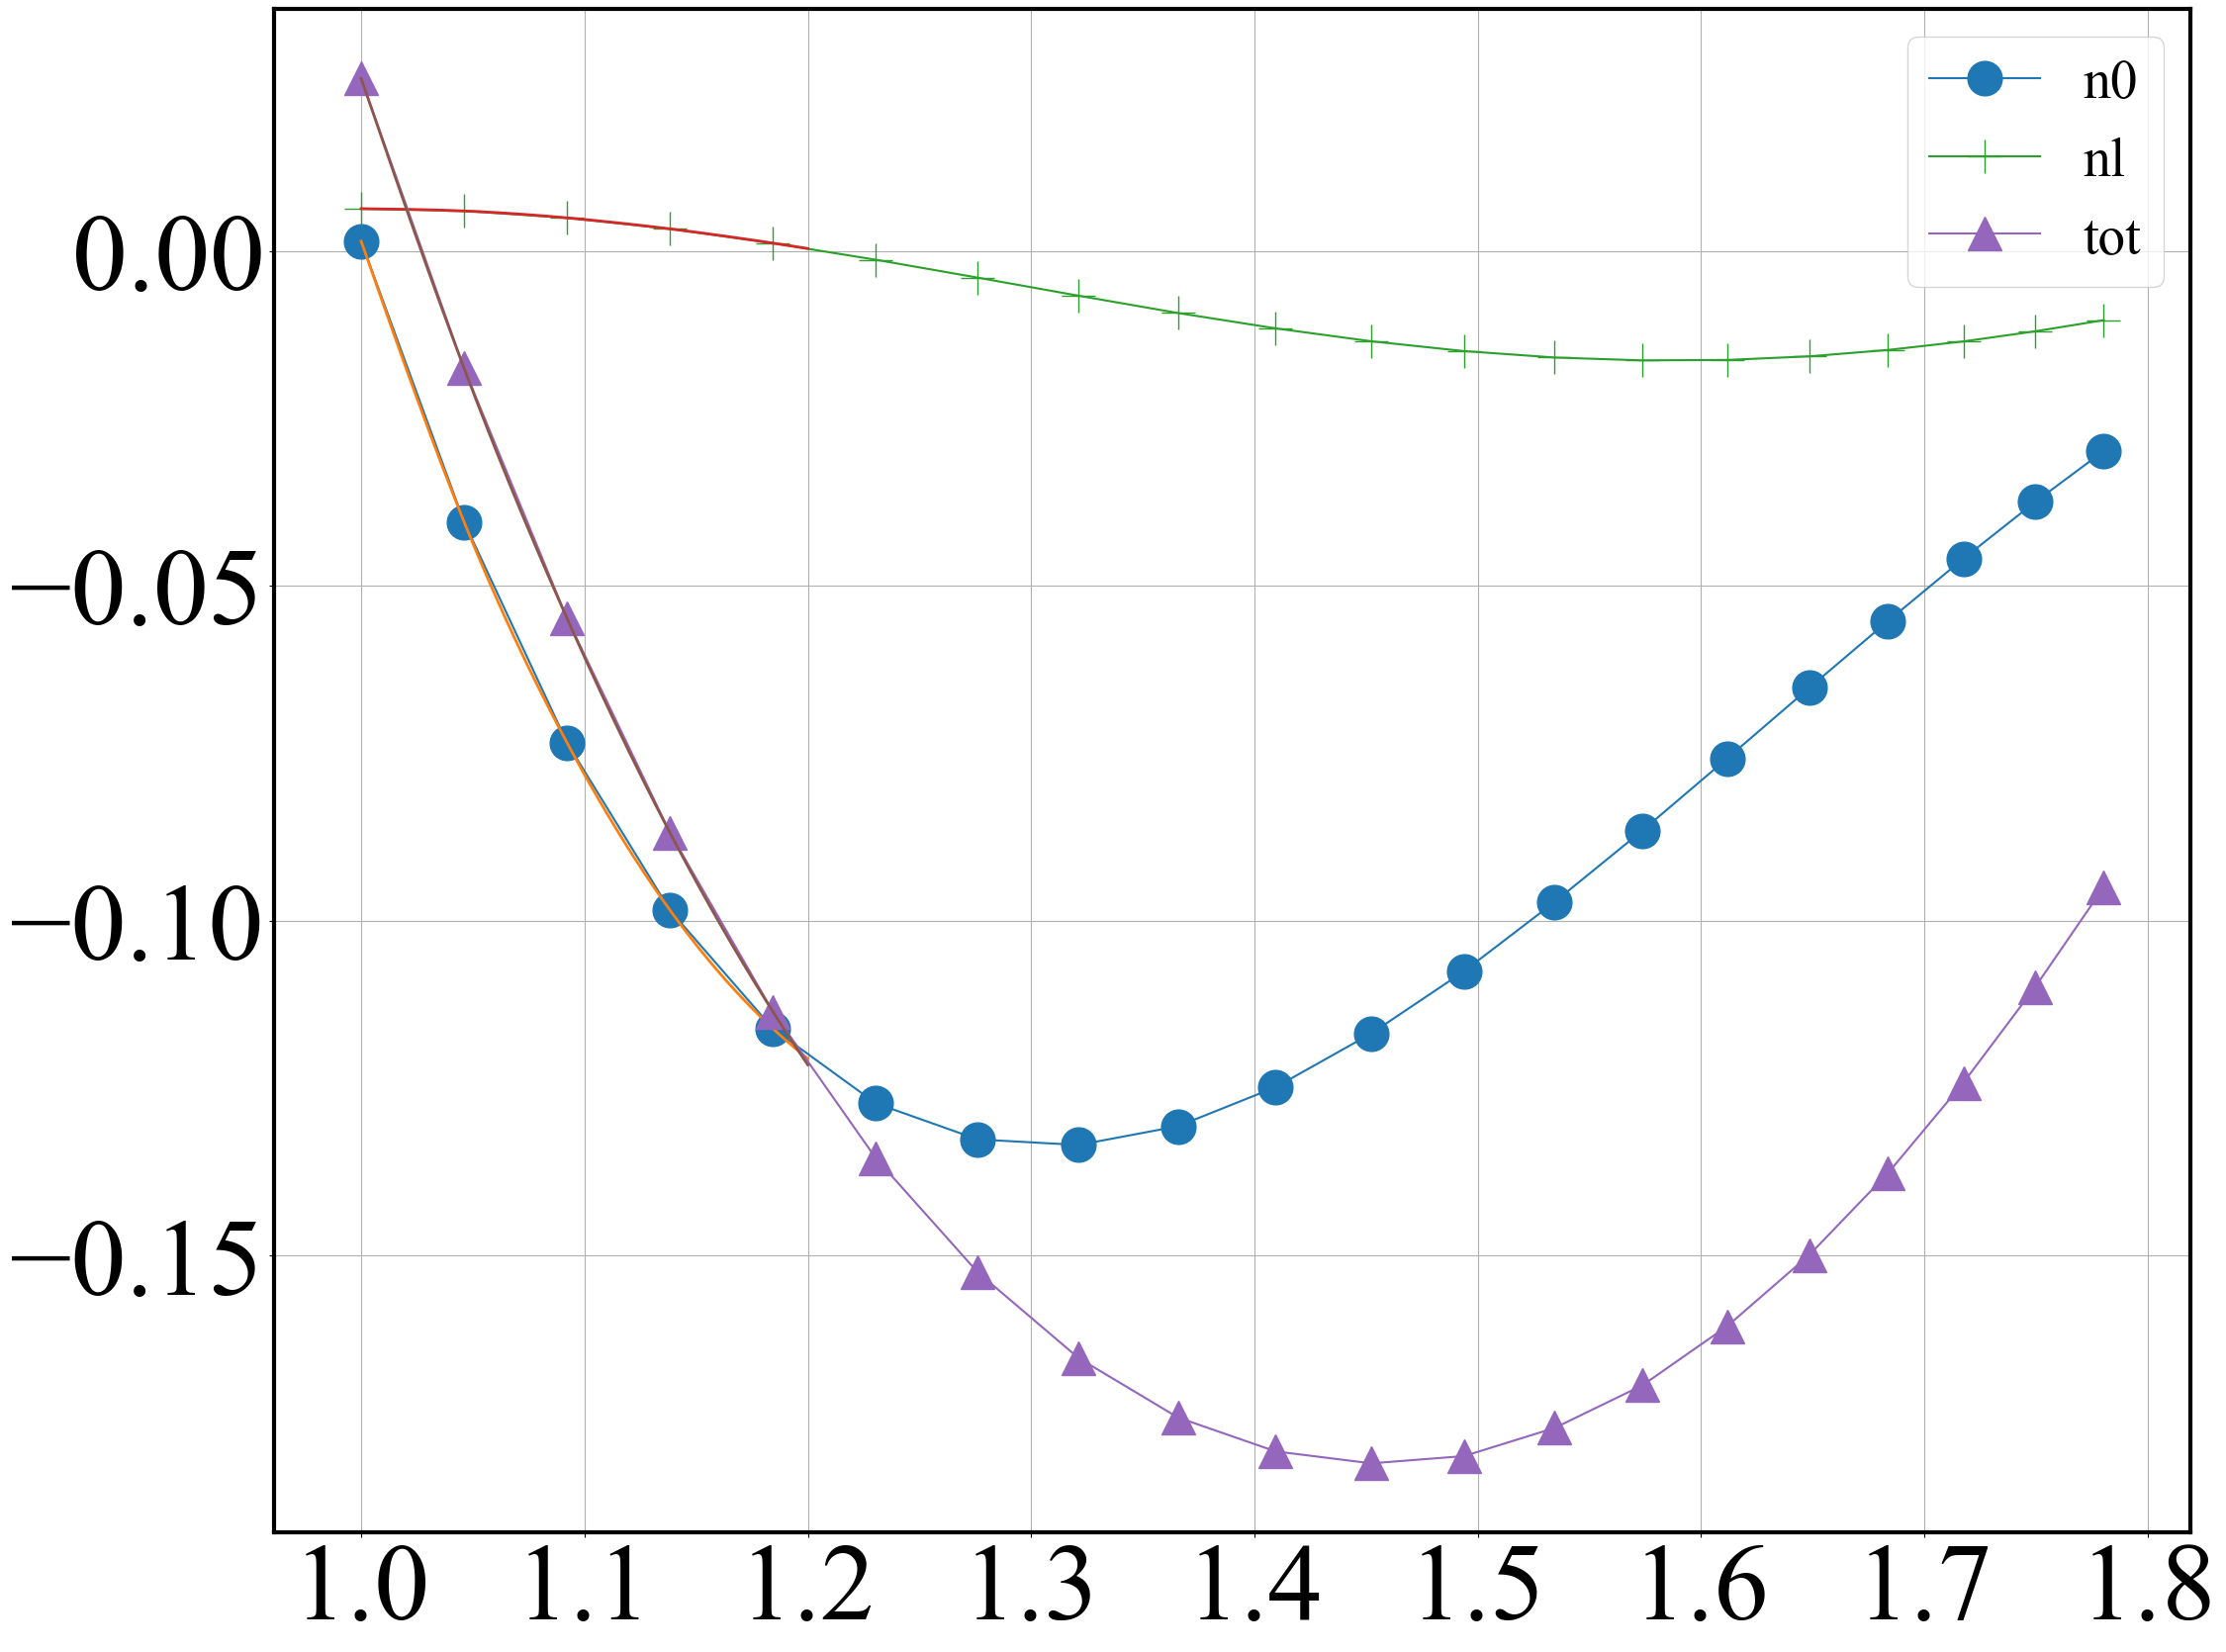

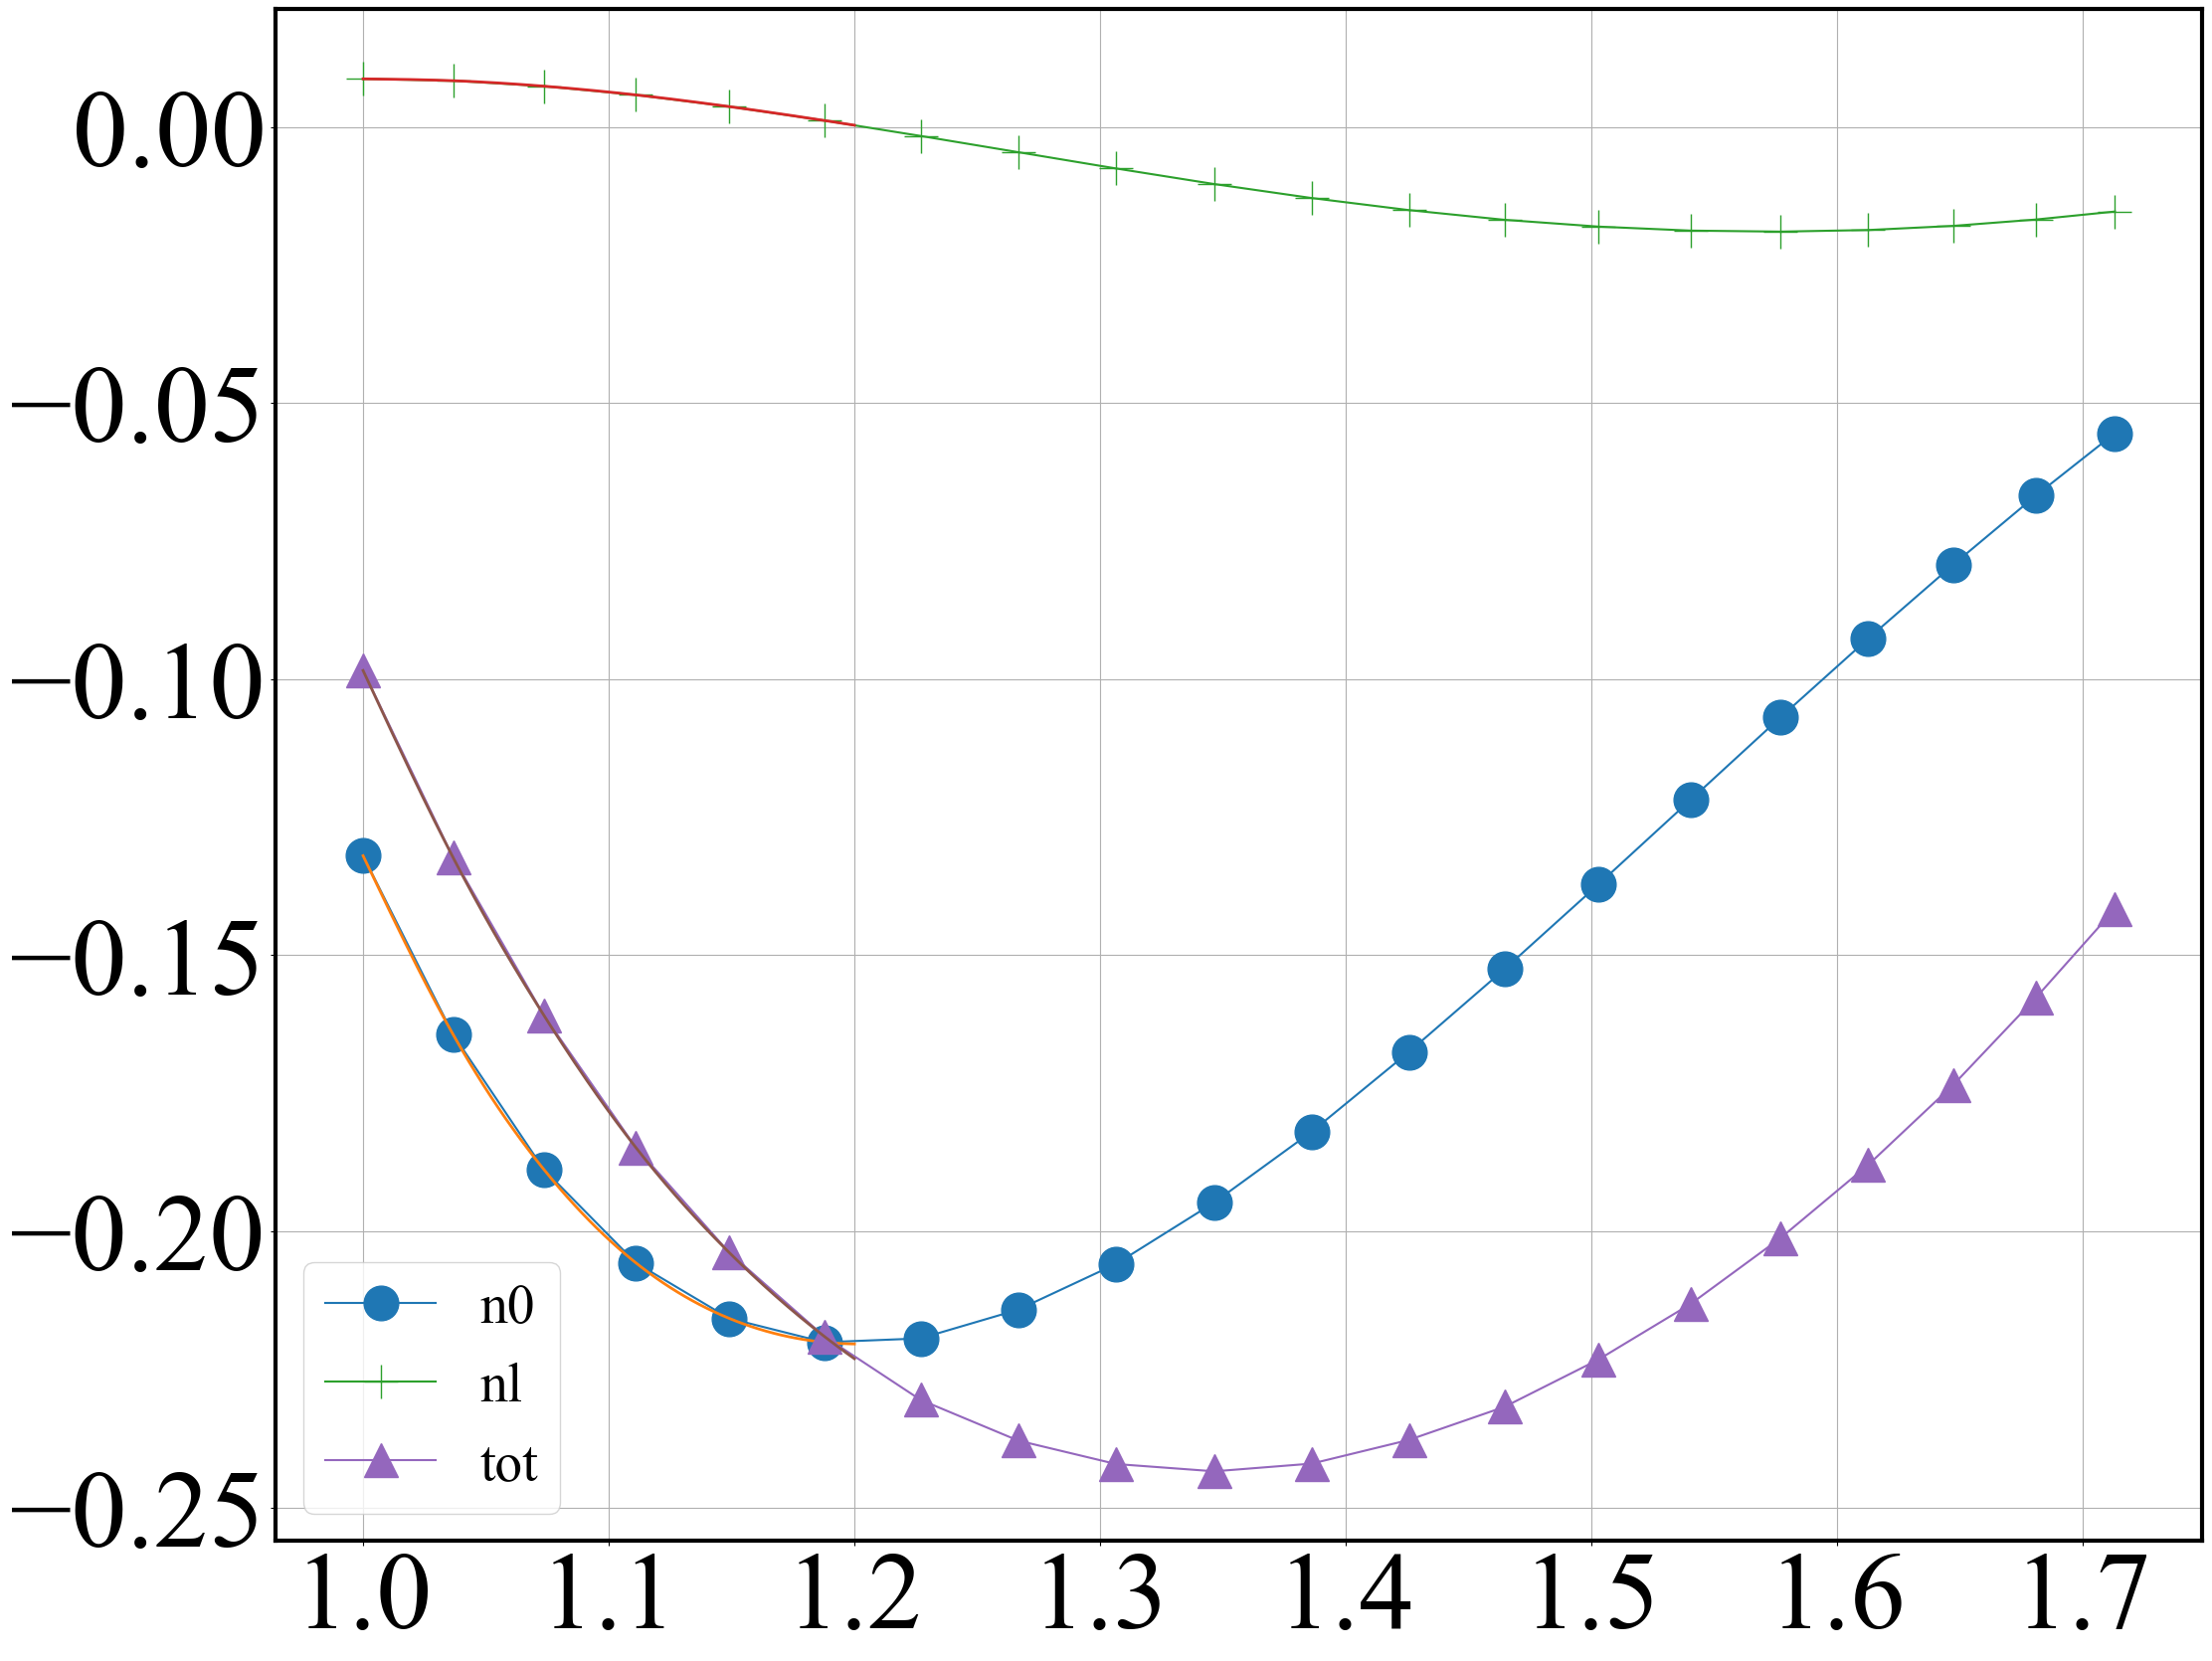

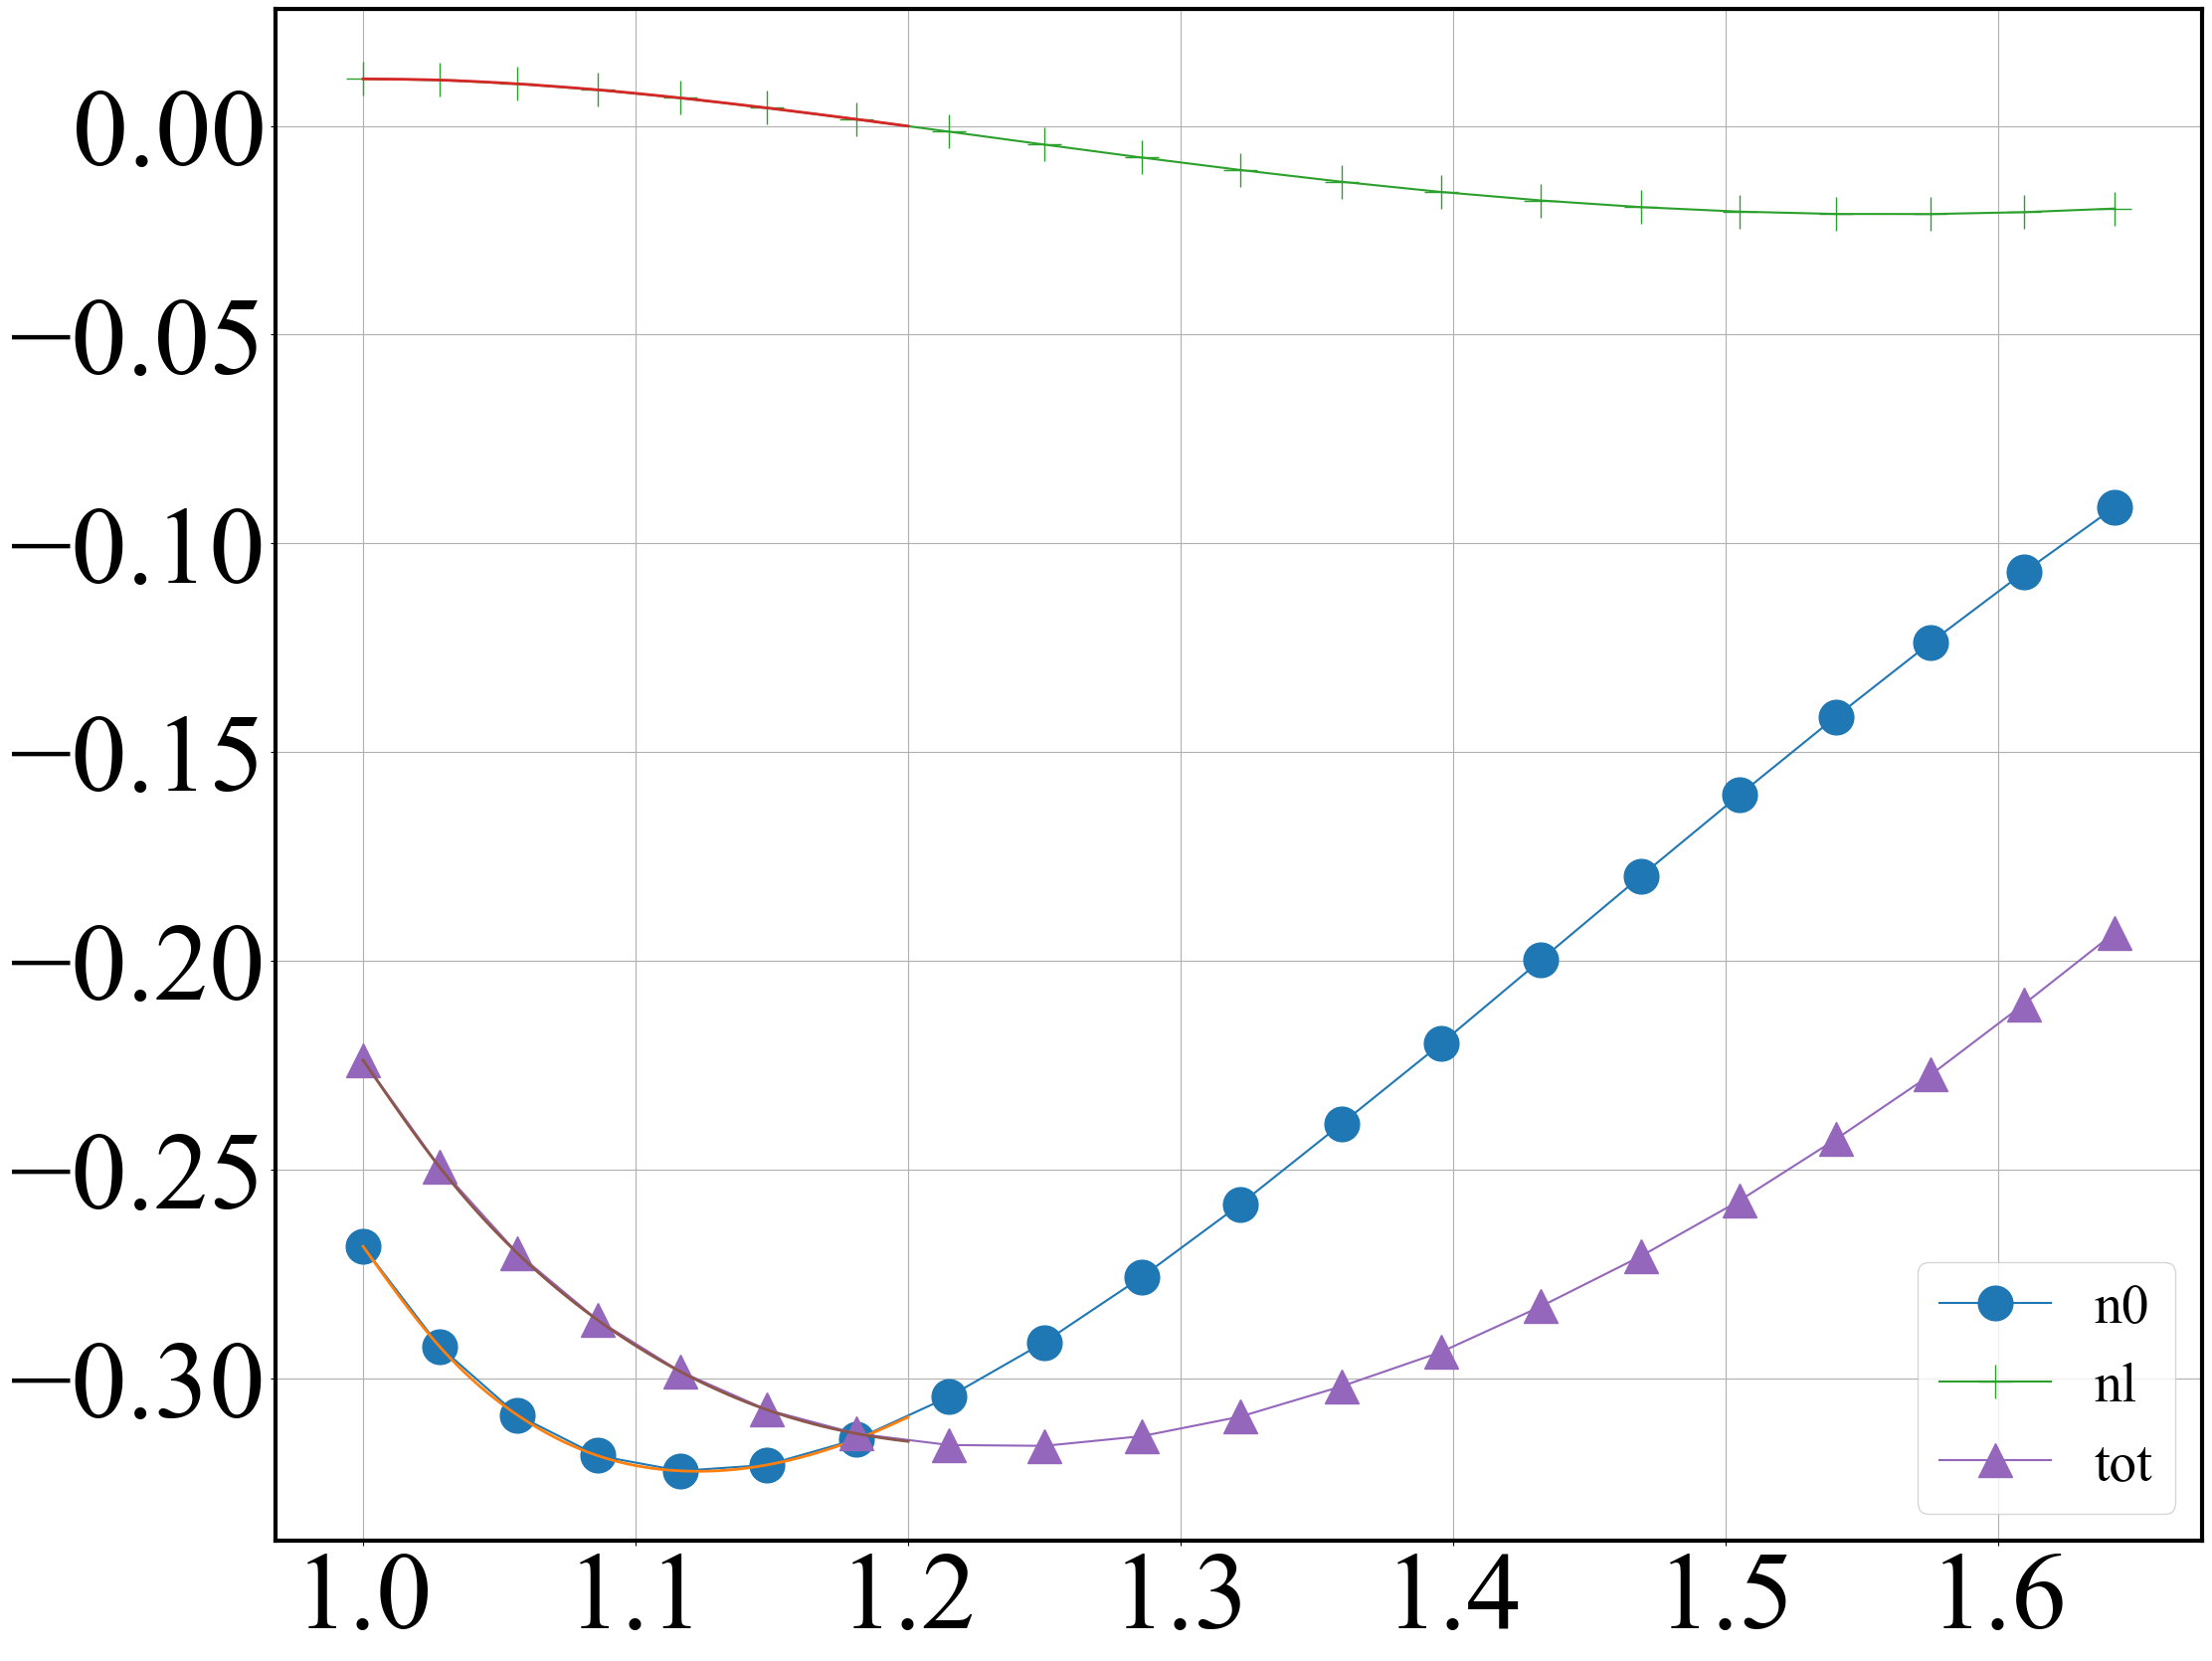

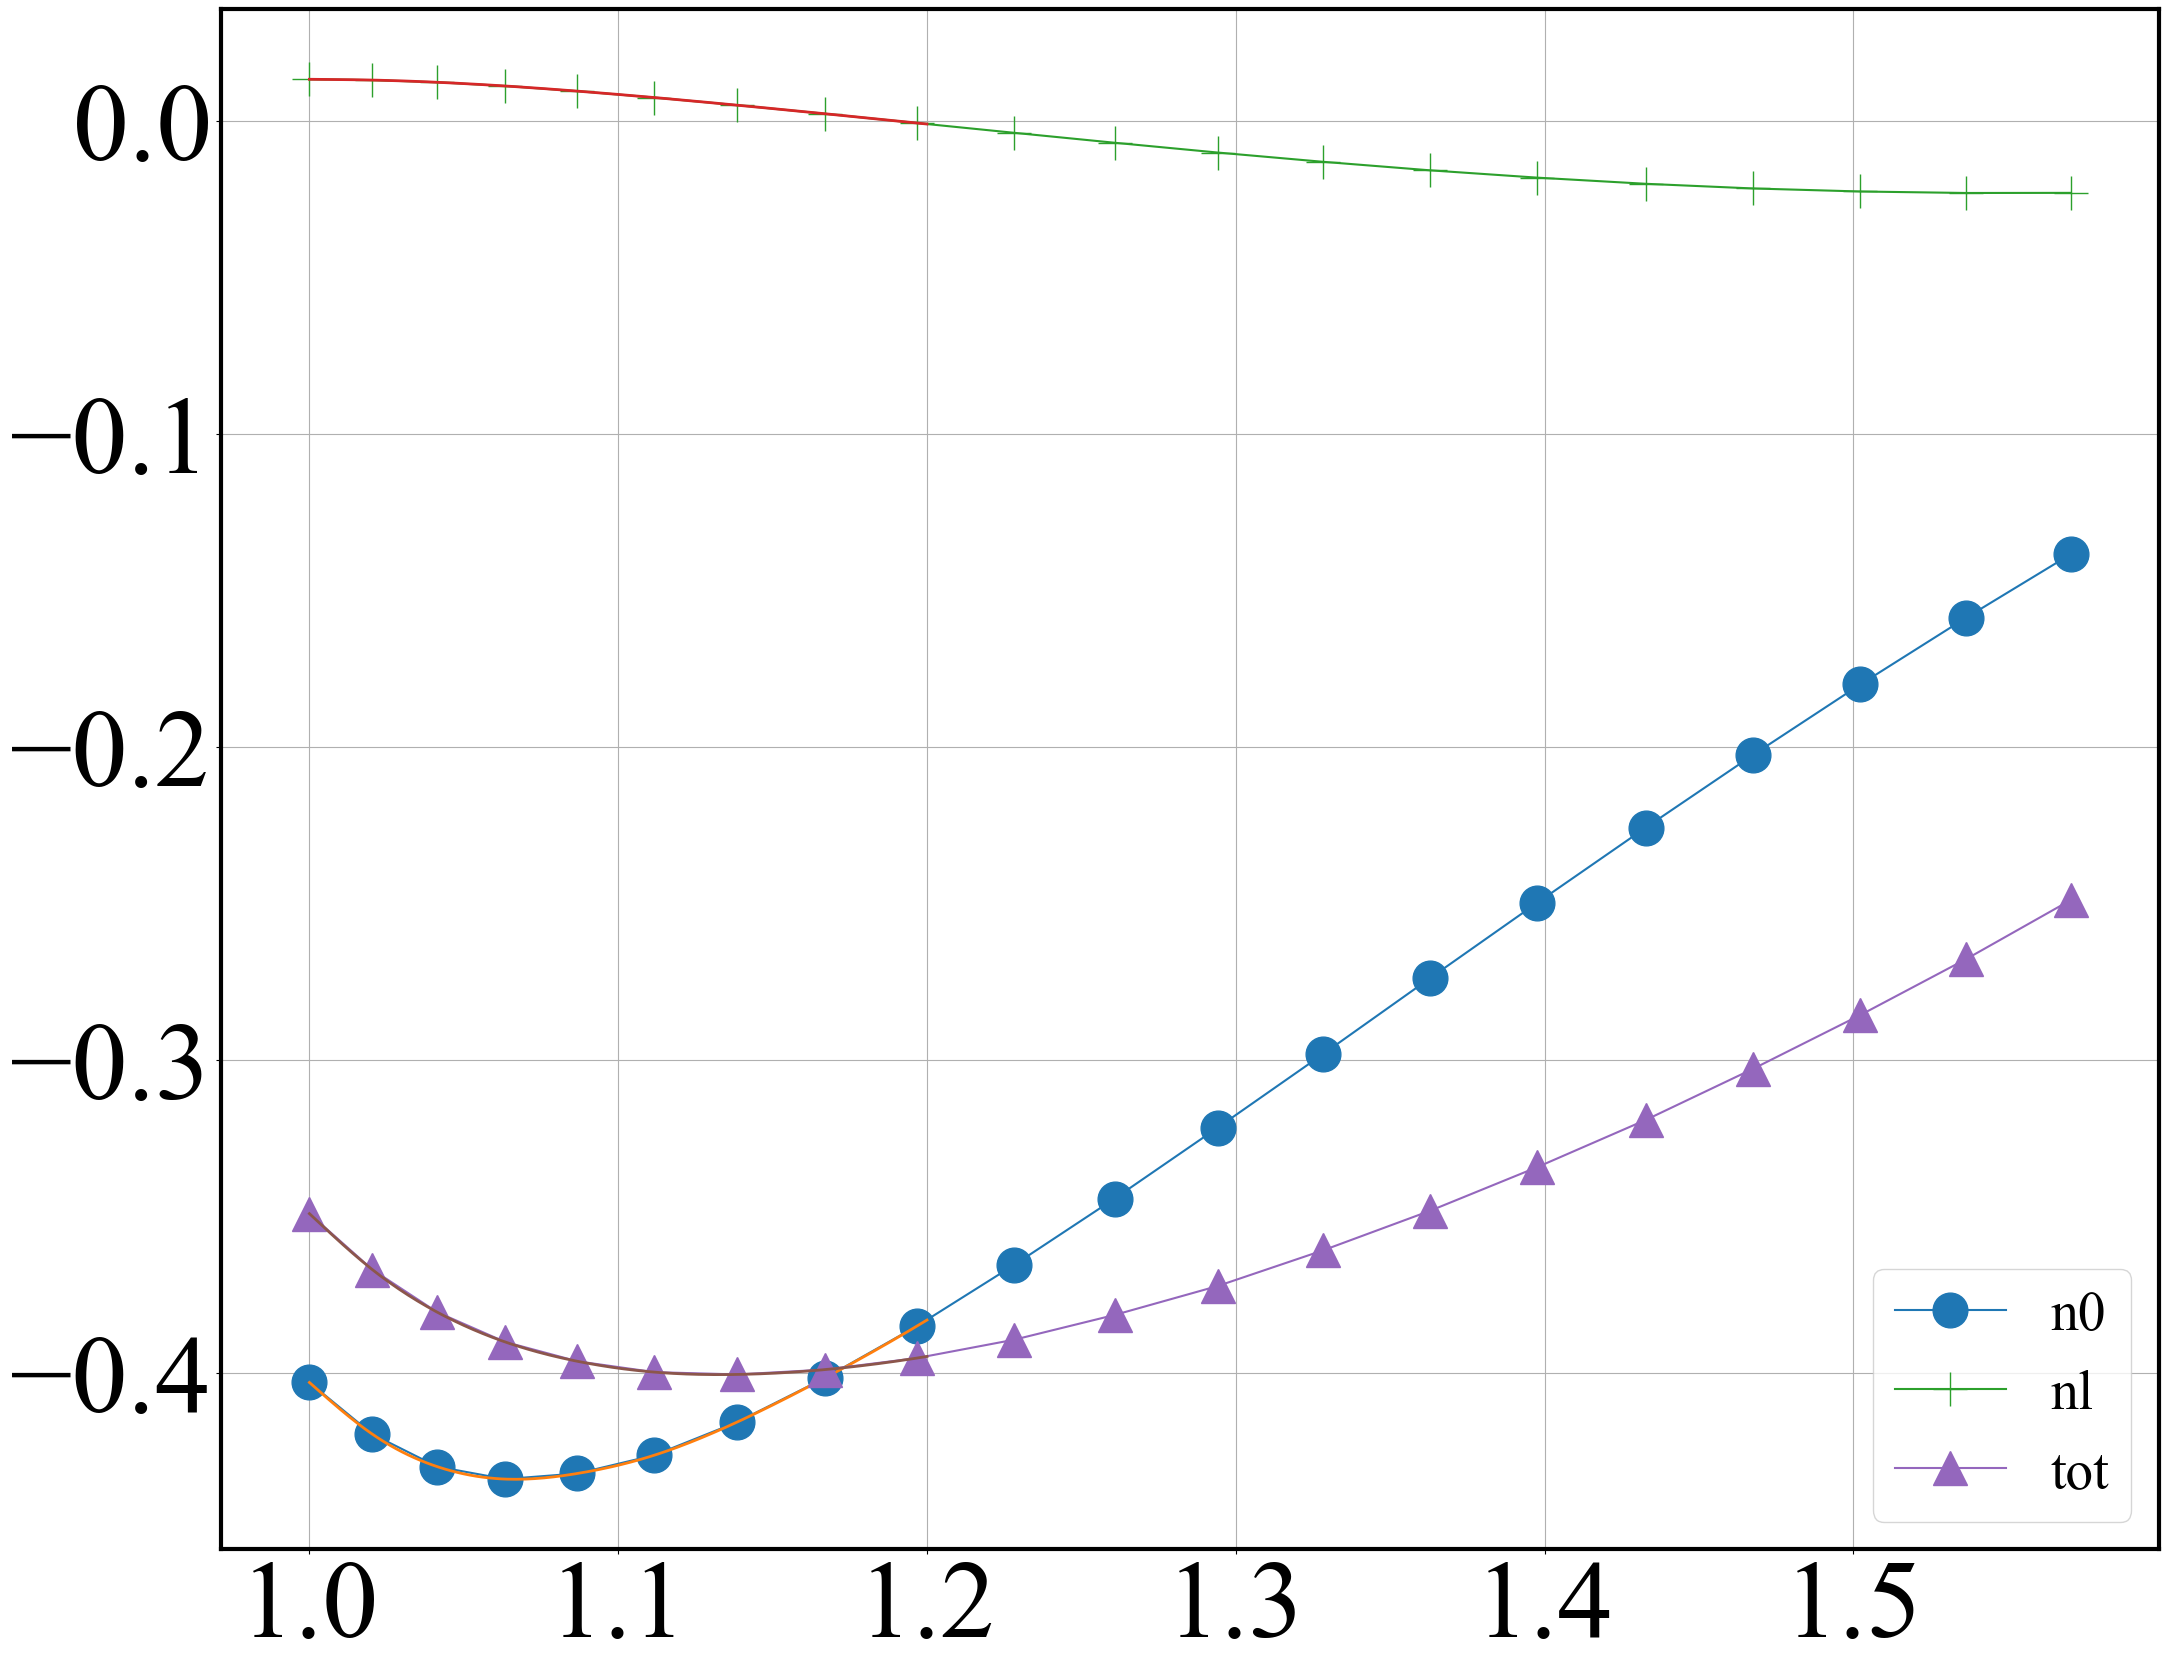

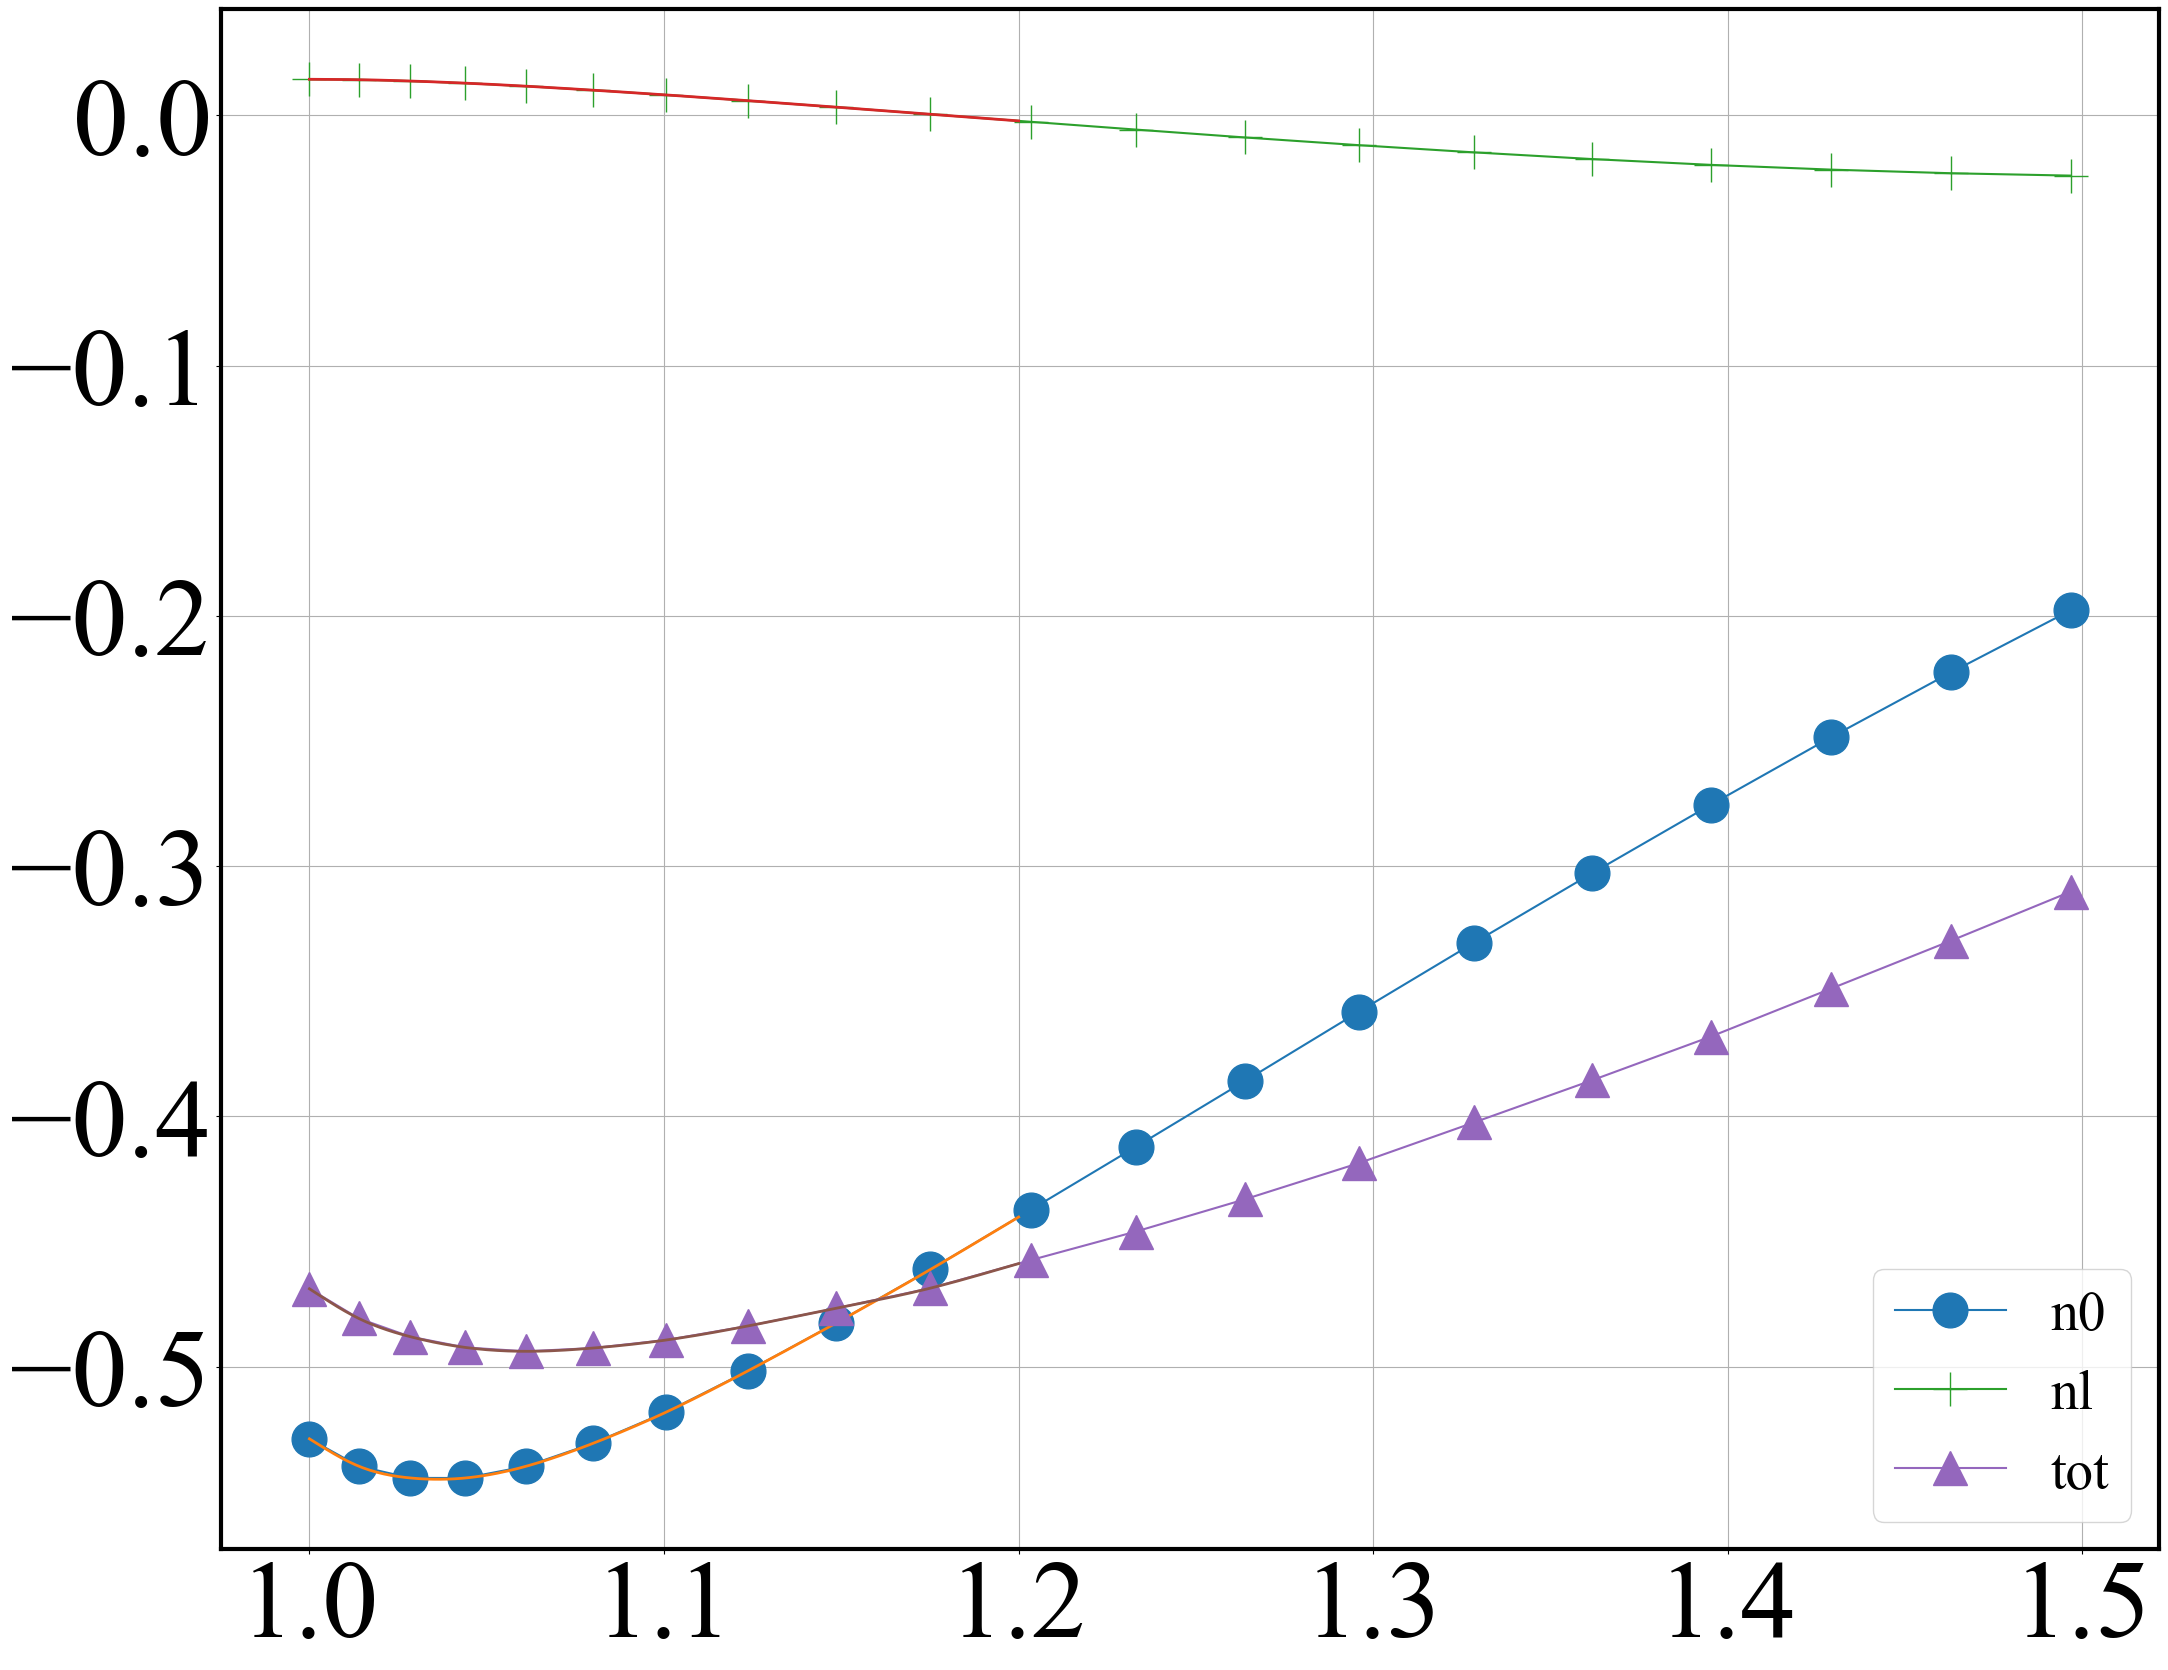

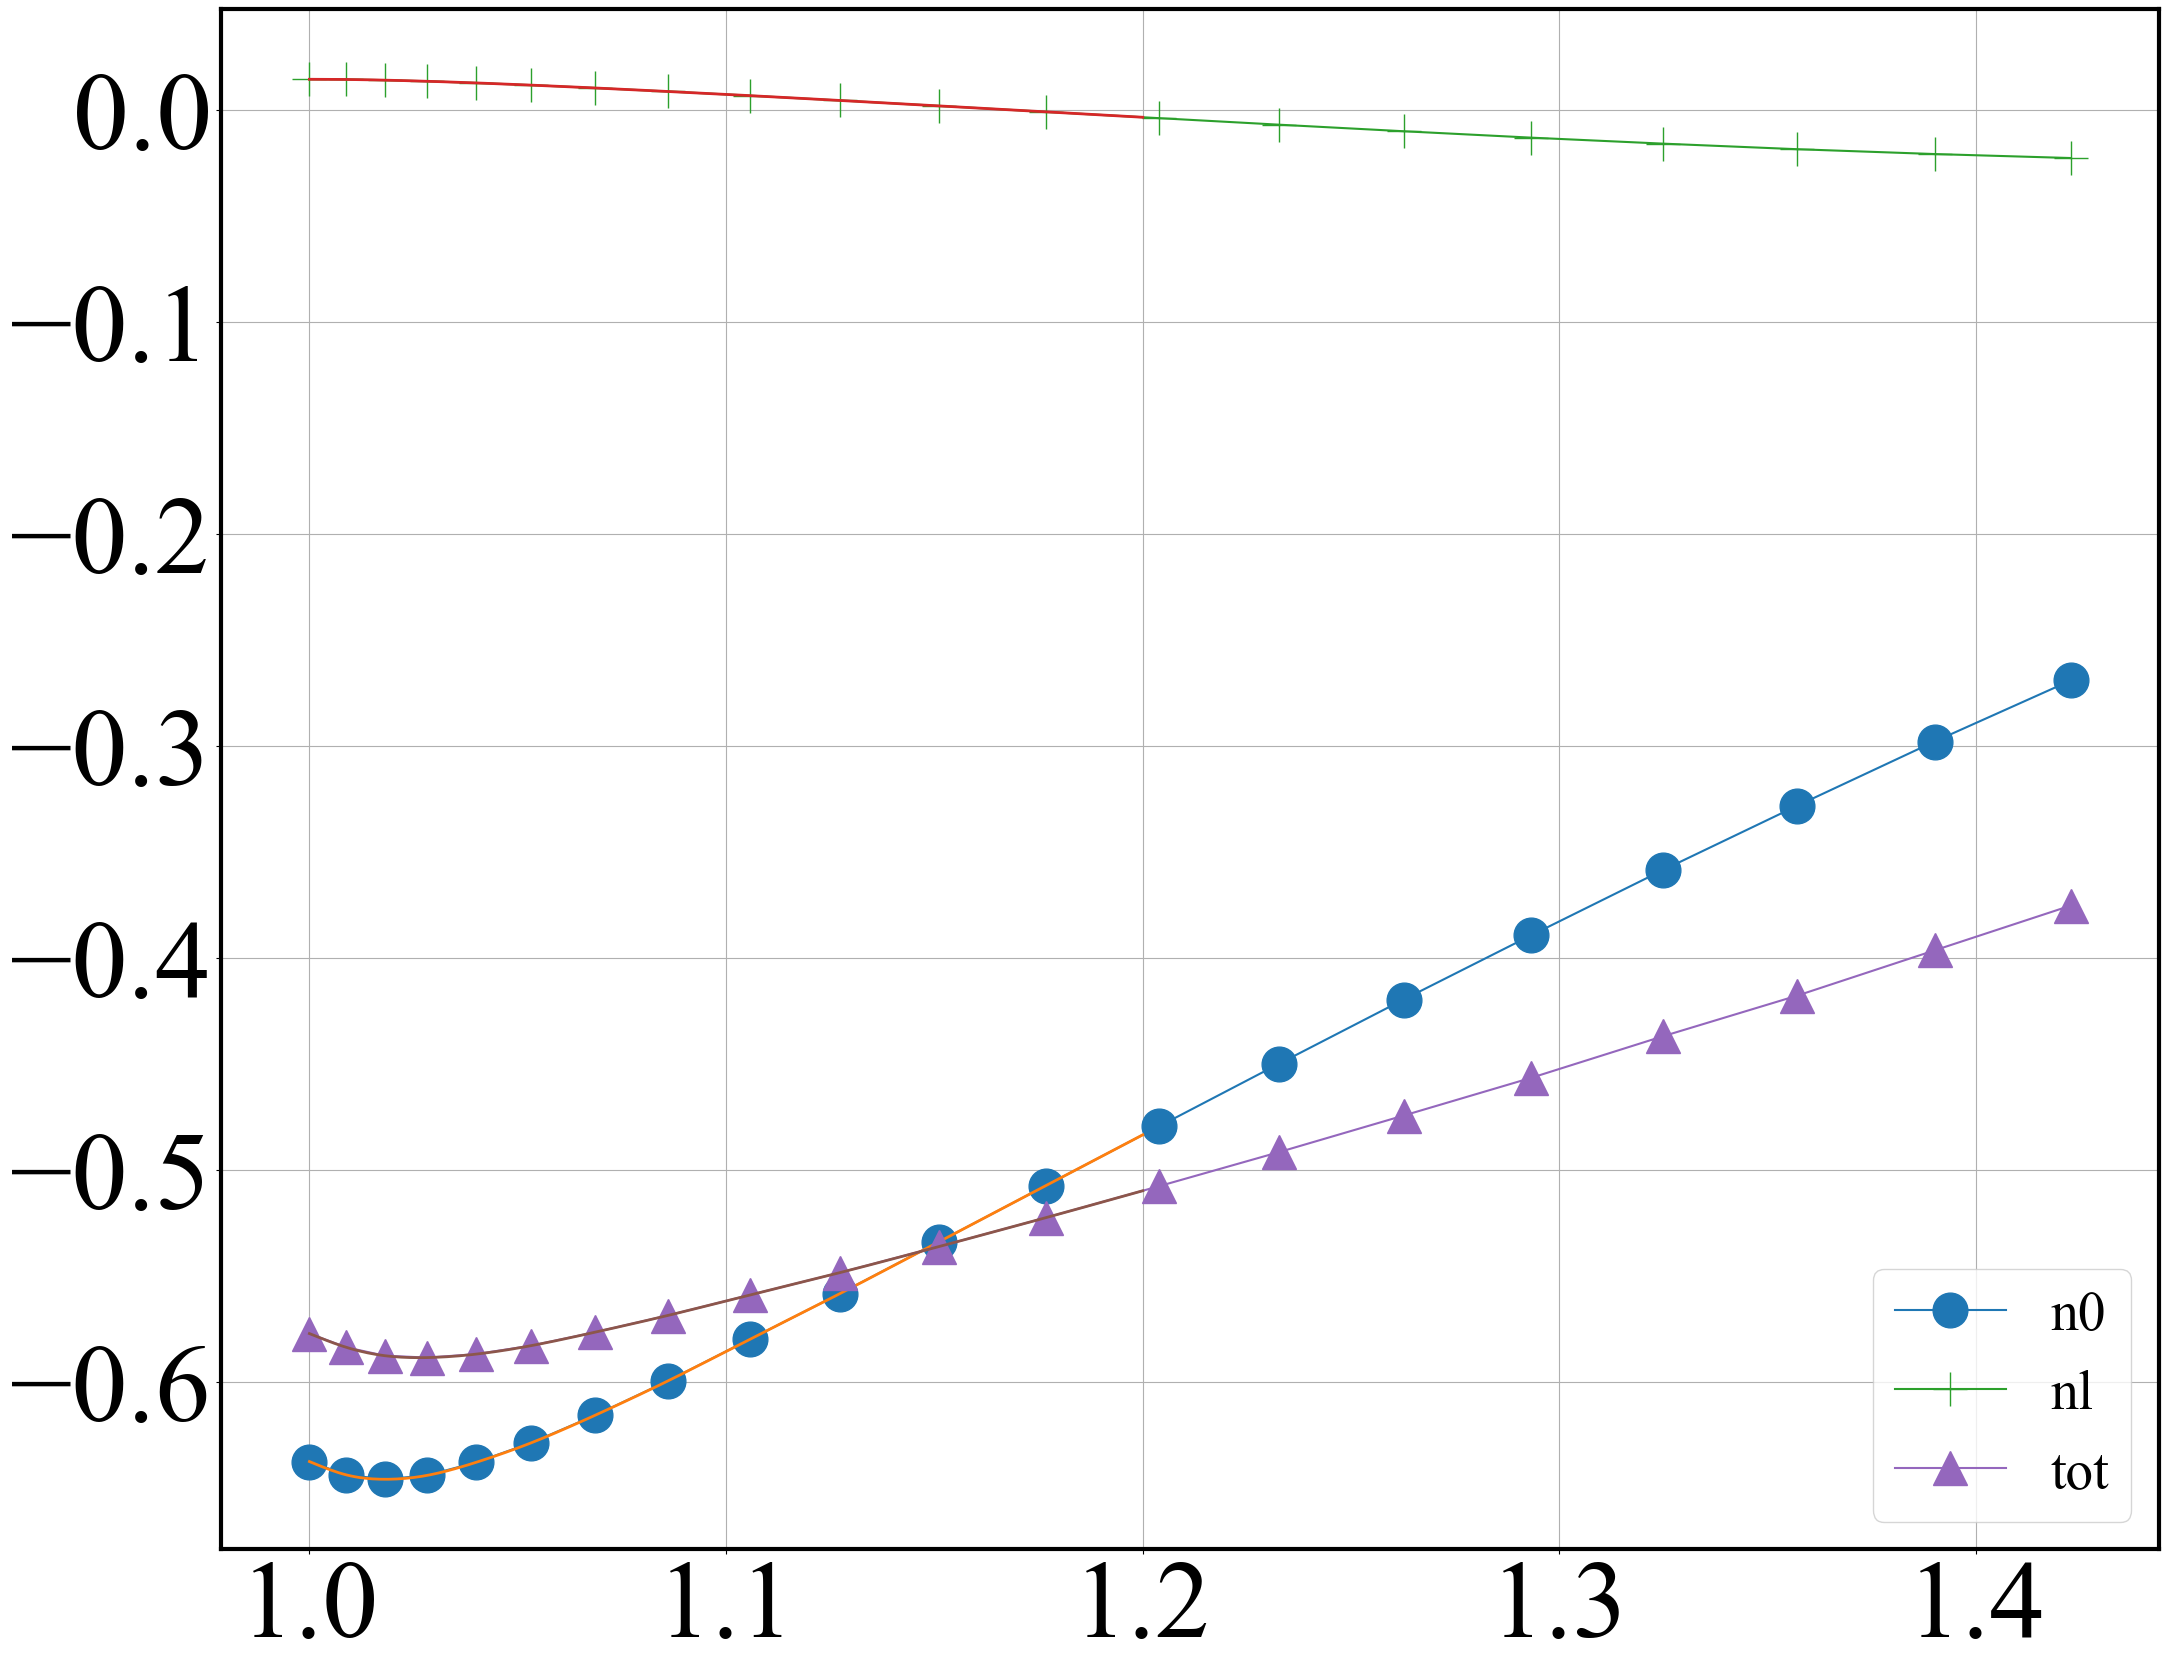

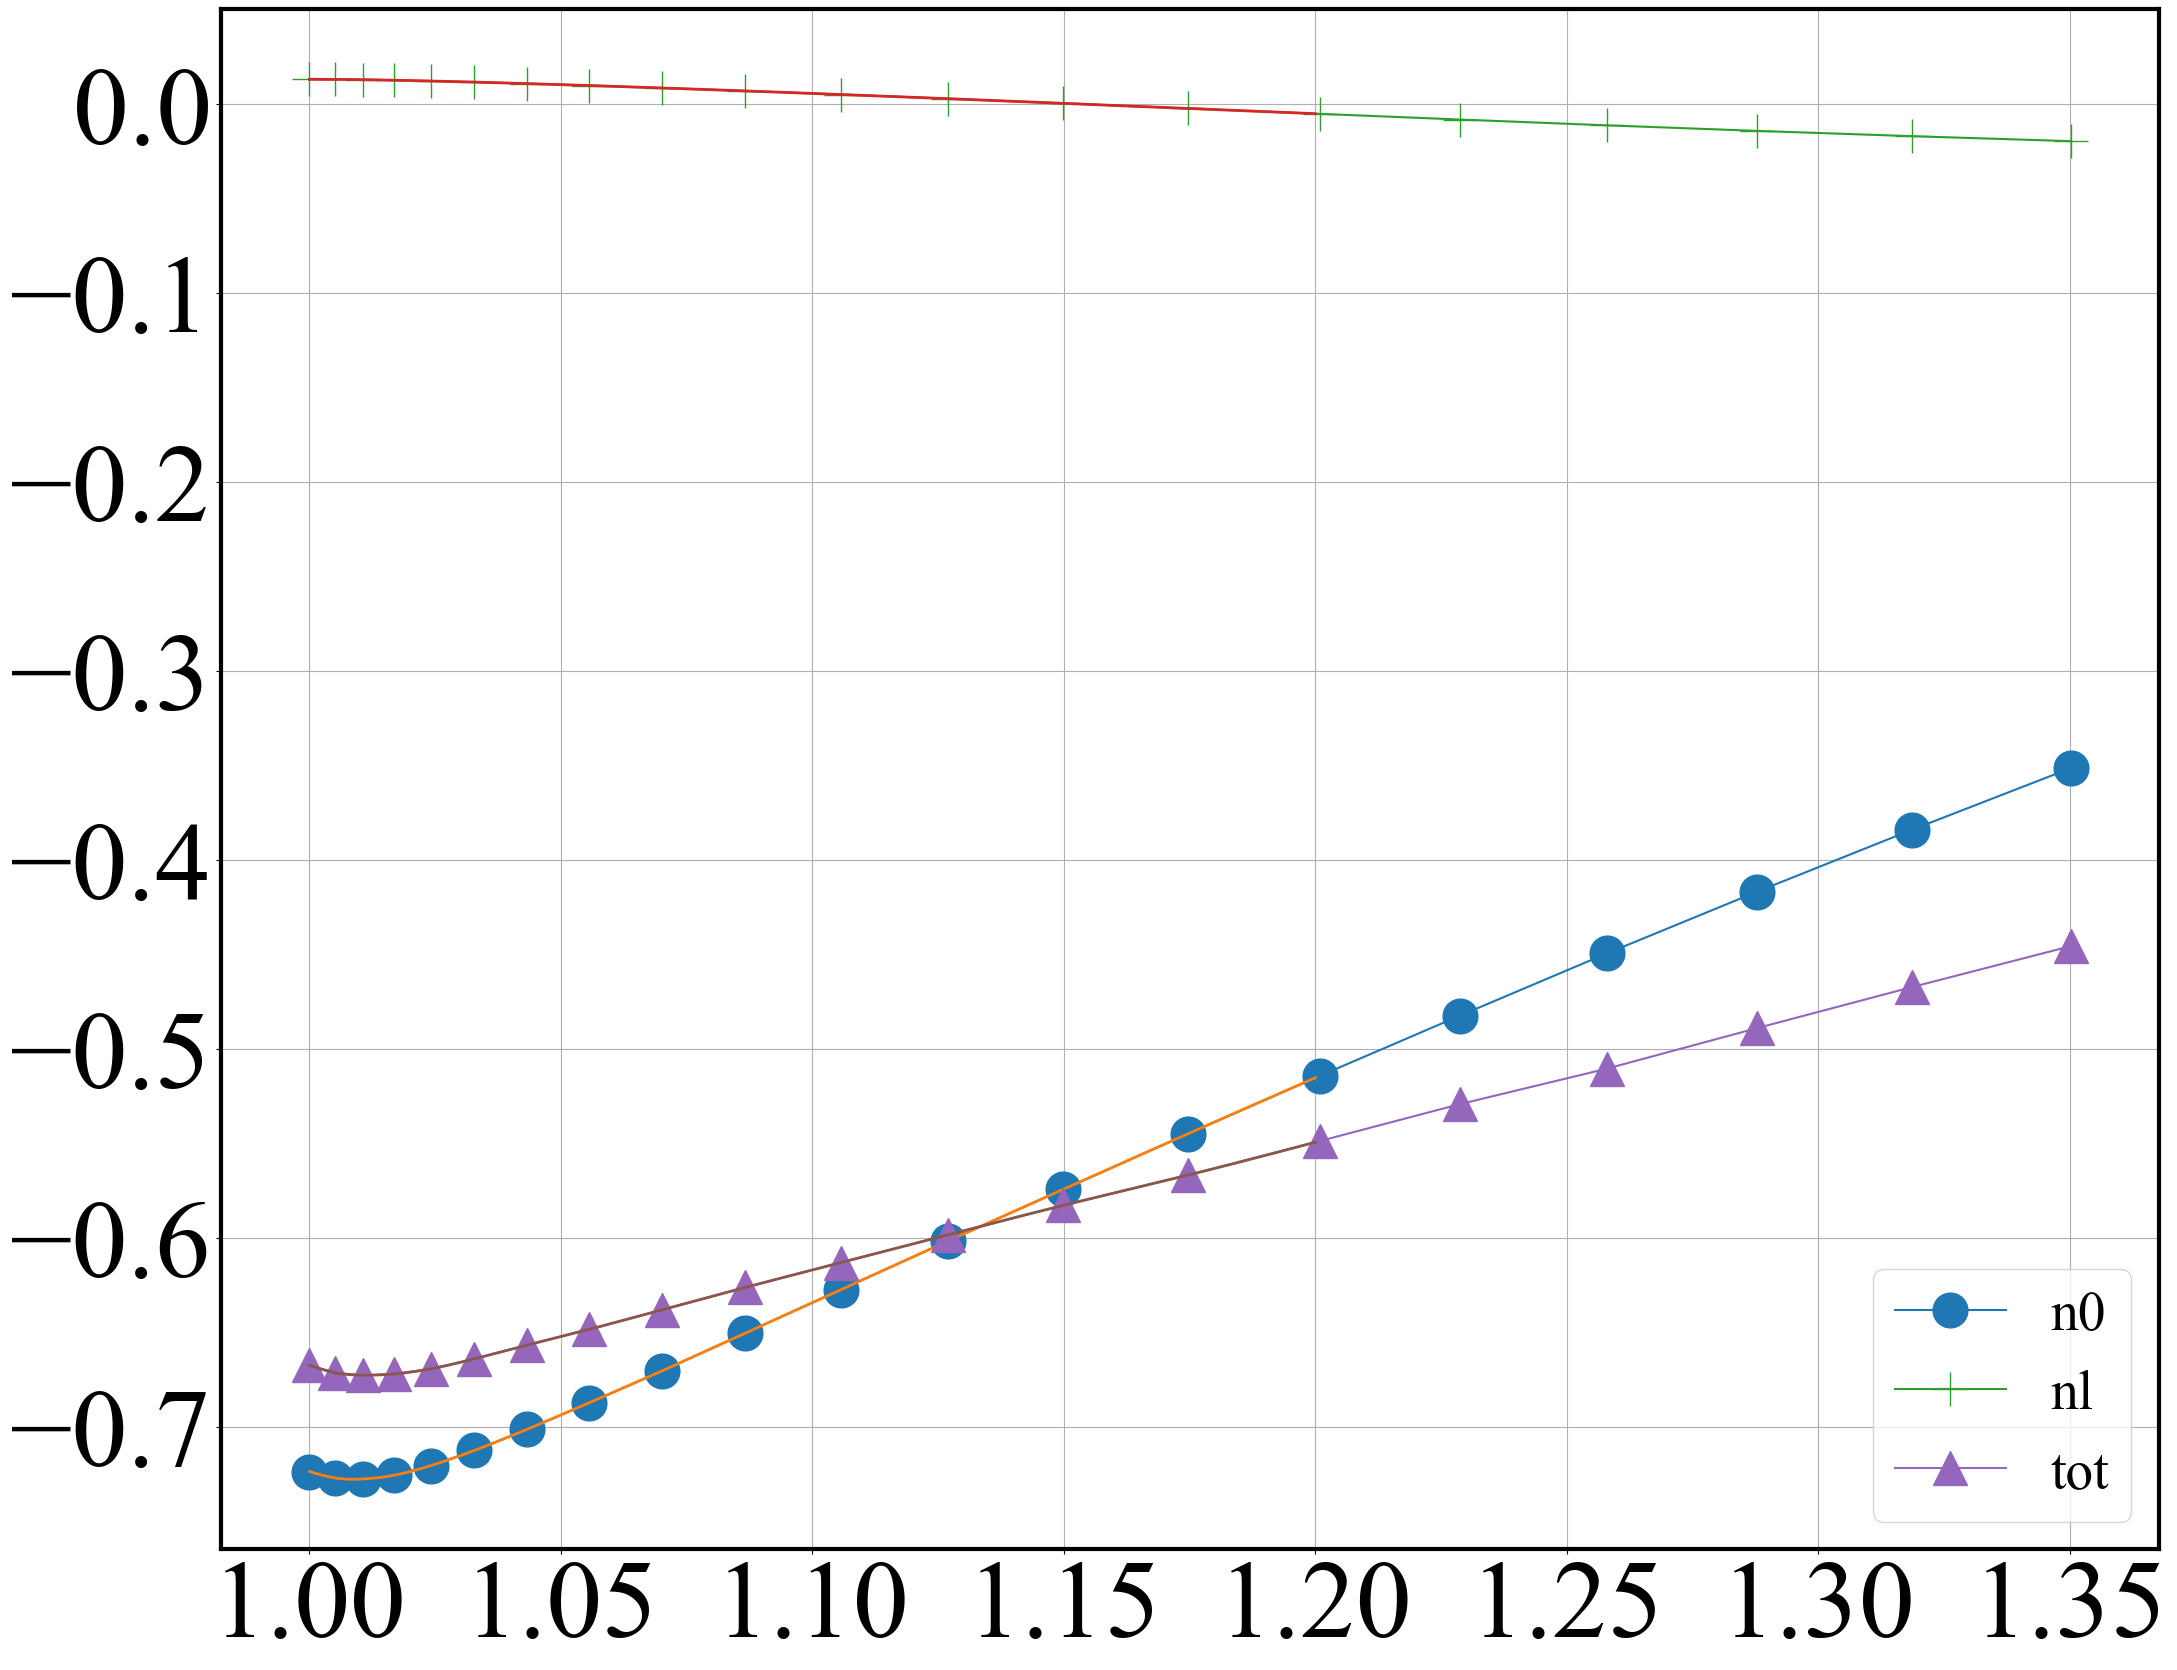

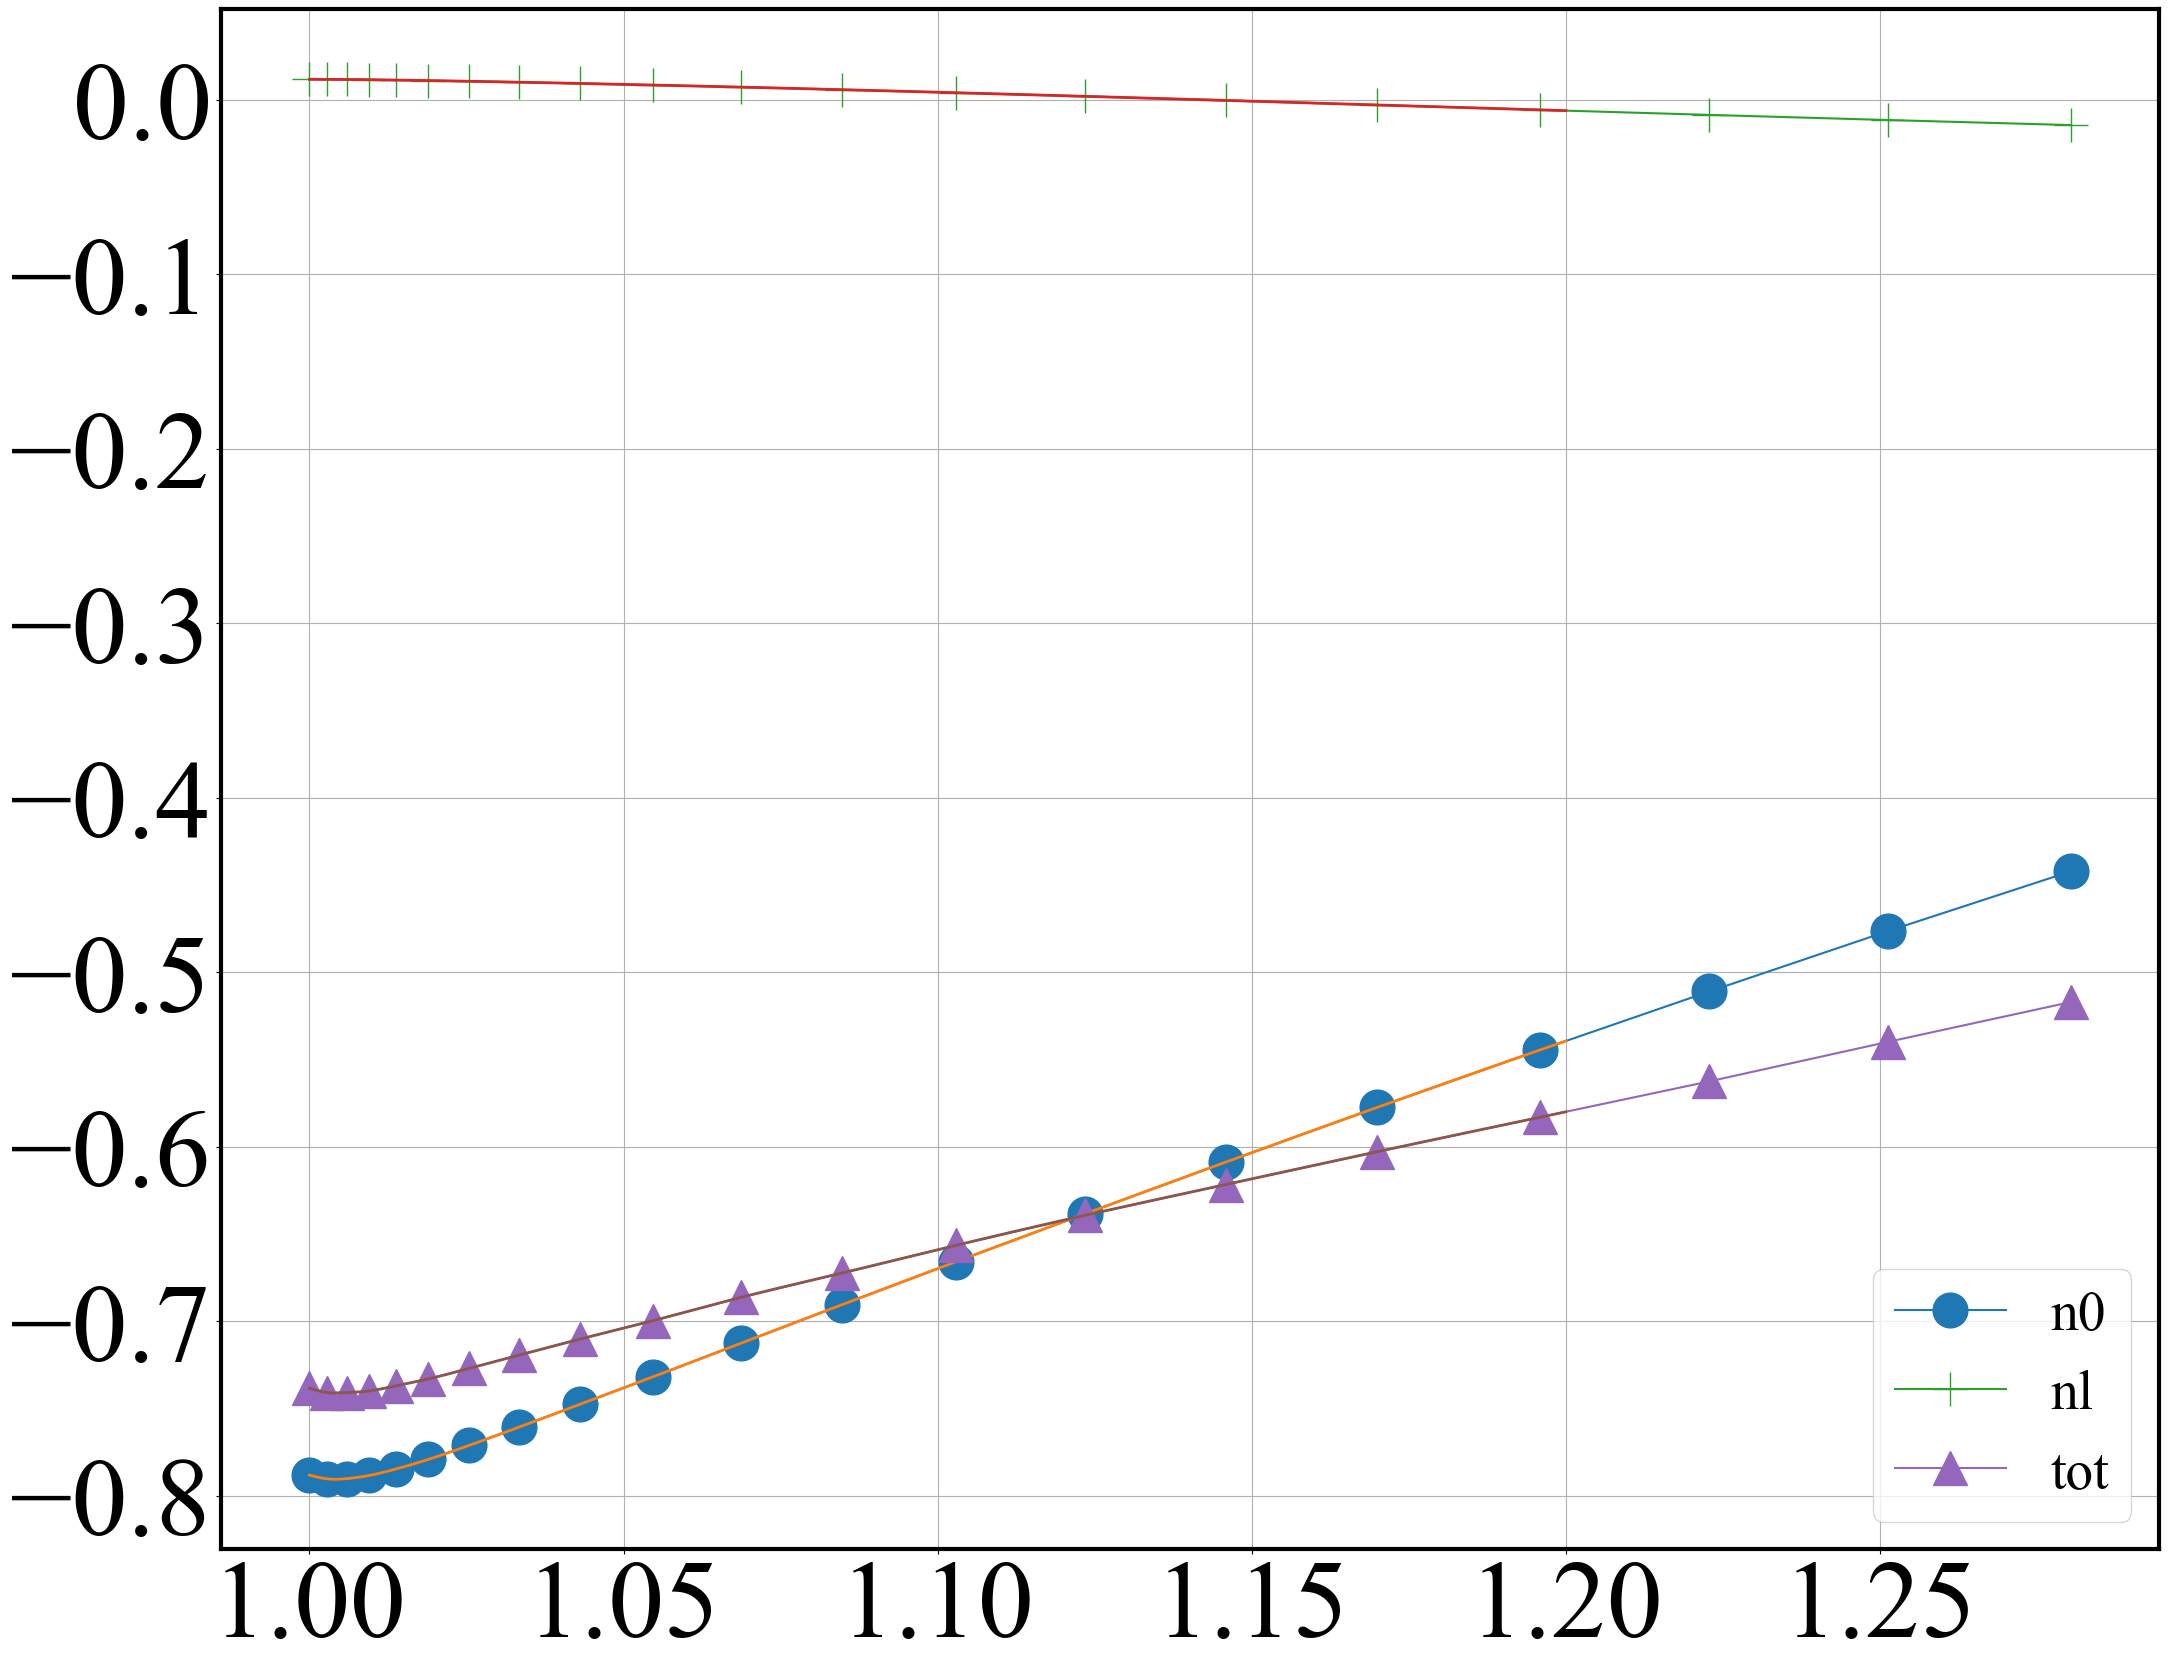

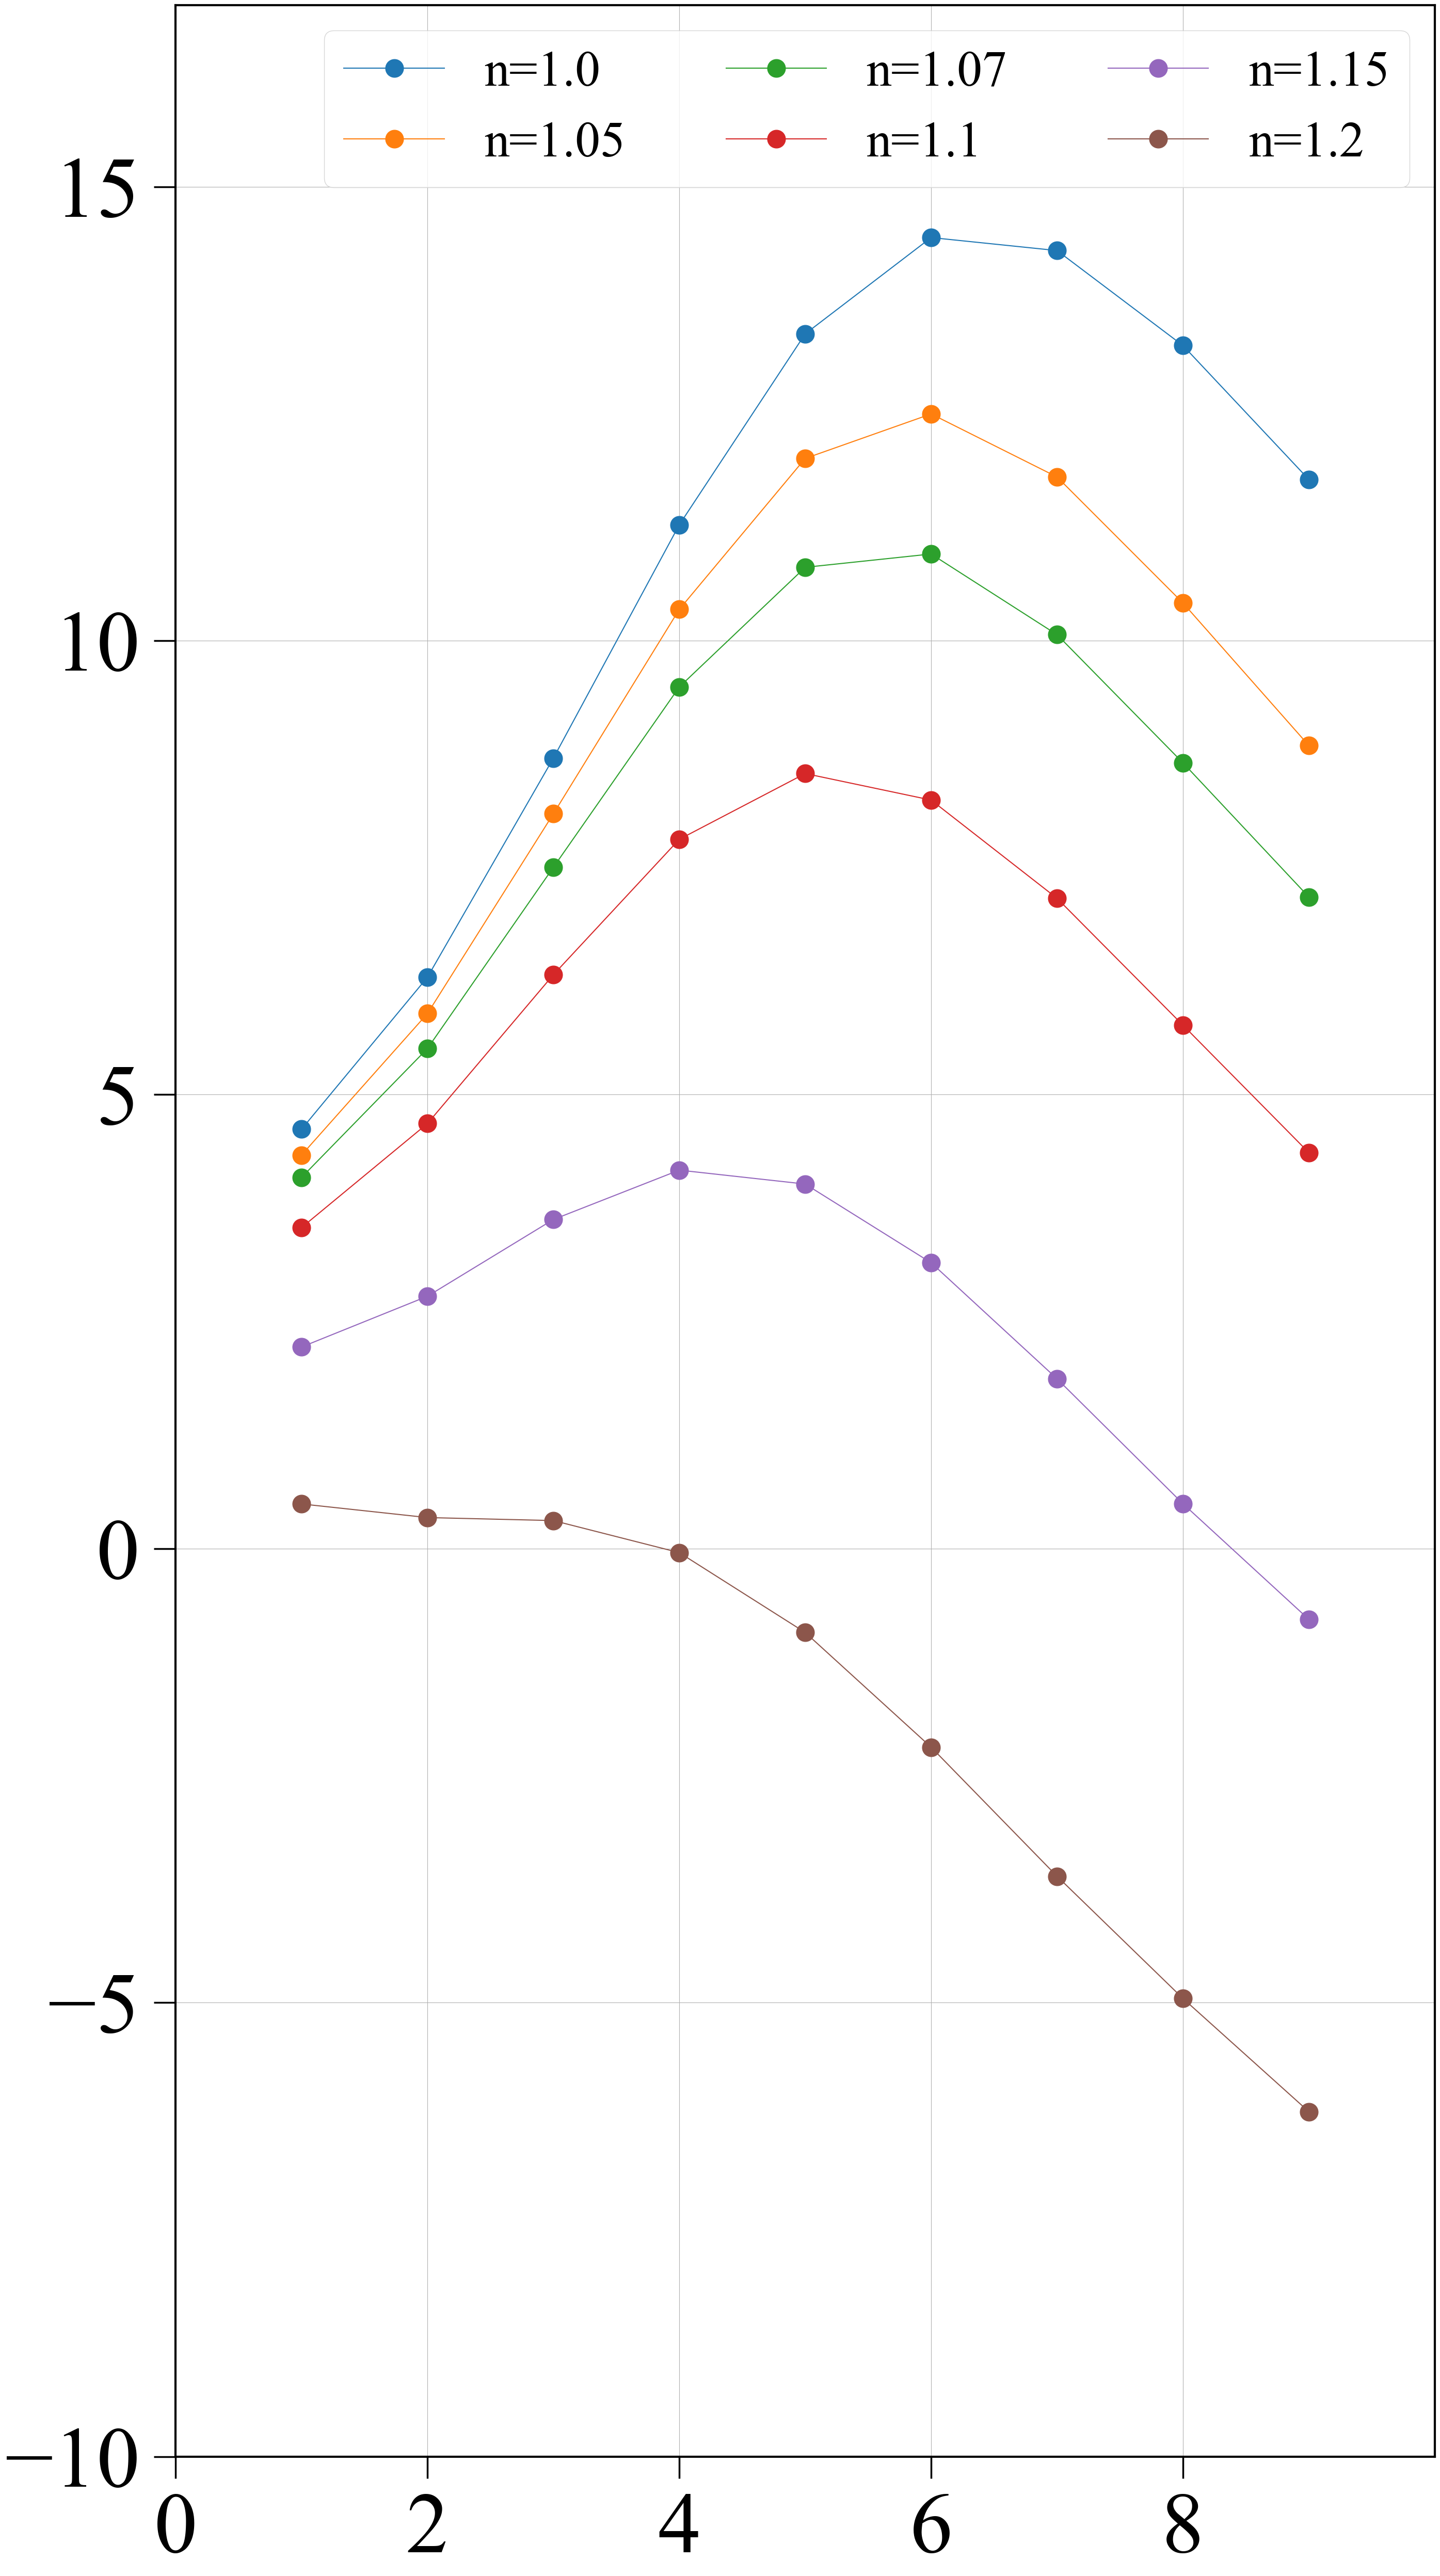

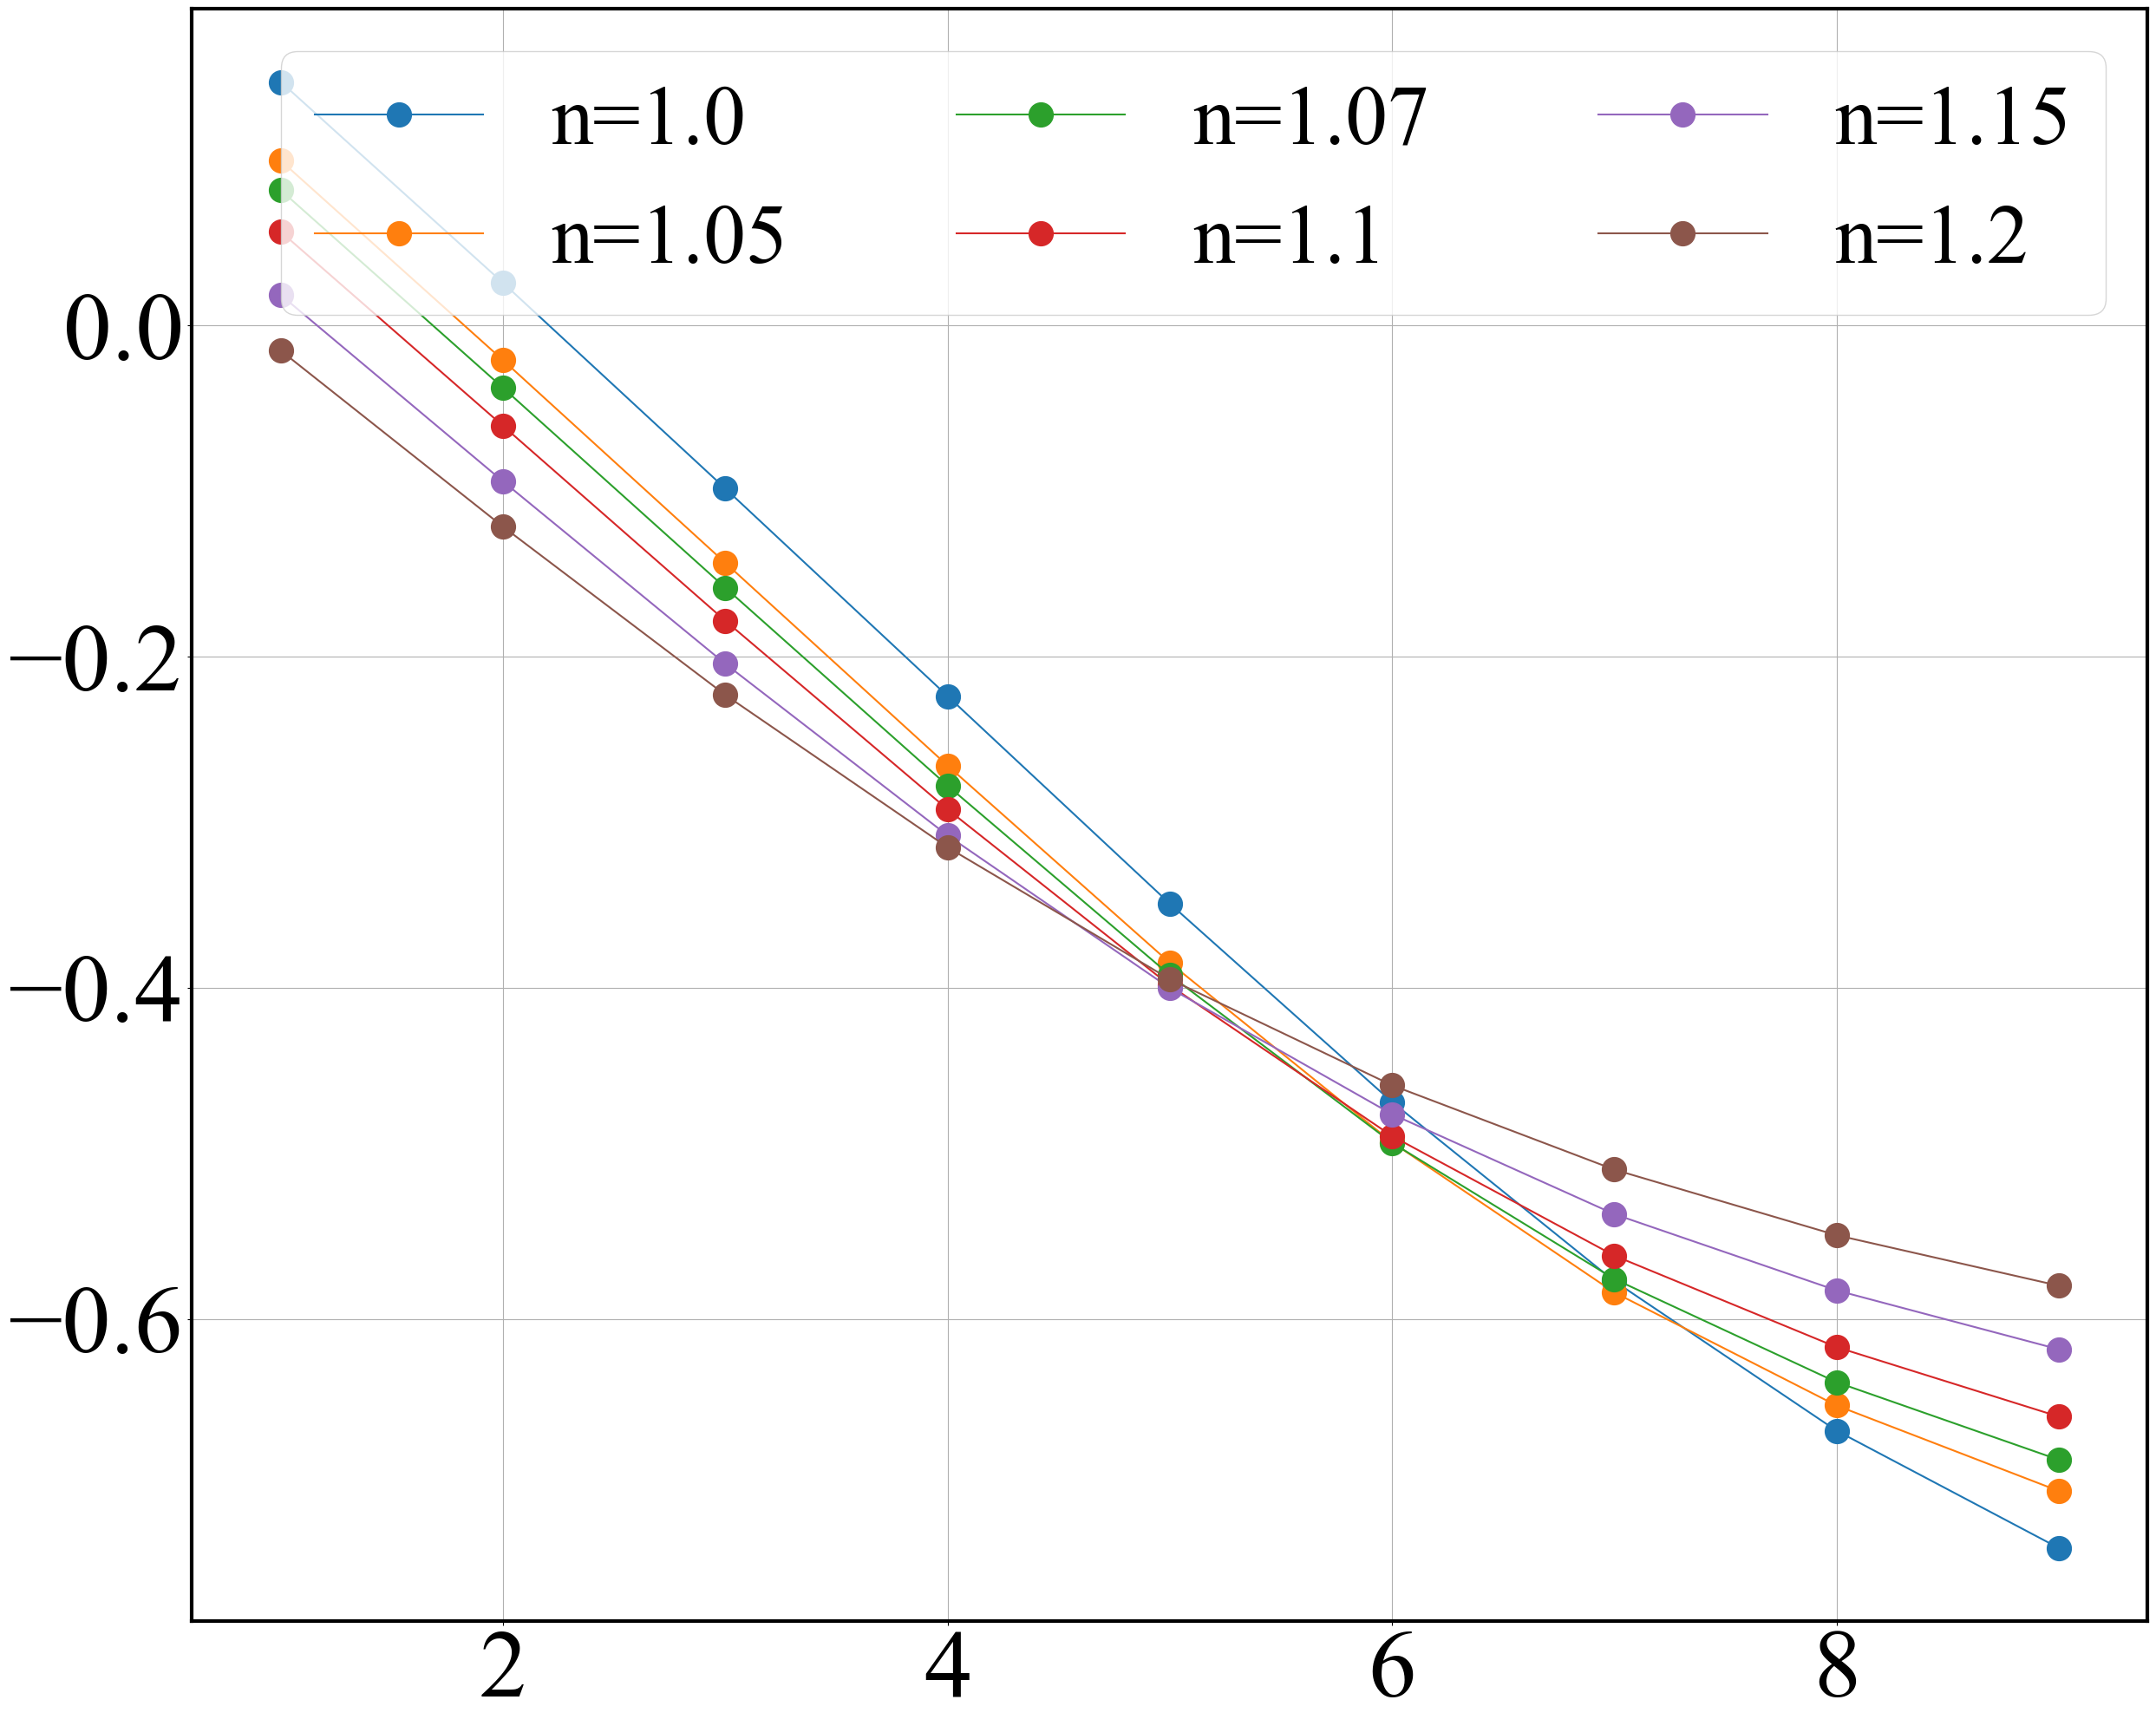

In [67]:
main()

In [68]:
N_1 = np.asarray([1.2208436724565757, 1.2109181141439205, 1.1910669975186106])
N_2 = np.asarray([1.211864406779661,1.2070217917675543, 1.194915254237288])
N_3 = np.asarray([1.208816338157447,1.2063950498104907,1.2003418289430996])
N_4 = np.asarray([1.197768125317684,1.197768125317684,1.197768125317684])
N_4p5 = np.asarray([1.1973365617433411,1.1973365617433411,1.1973365617433411])
N_5 = np.asarray([1.191283292978208,1.191283292978208,1.1949152542372878])
N_5p5 = np.asarray([


SyntaxError: incomplete input (3515791269.py, line 7)